In [1]:
import pandas as pd
import numpy as np

# Generate example series
np.random.seed(42)
prices = pd.Series(100 + np.cumsum(np.random.randn(100)))

# d = 0: Original series
d0 = prices

# d = 1: First difference (returns)
d1 = prices.diff()  # X_t - X_{t-1}

# d = 2: Second difference
d2 = prices.diff().diff()  # (X_t - X_{t-1}) - (X_{t-1} - X_{t-2})
# Or equivalently: d2 = prices.diff(periods=1).diff(periods=1)

The code in the book is missing the "thres" parameter, though there is a comment about it...

In [2]:
import matplotlib.pyplot as mpl
import pandas as pd
import numpy as np

def getWeights(d, size):
    #thres > 0 drops insignificant weights
    w=[1.]
    for k in range(1, size):
        w_ = -w[-1] * (d - k + 1) / k
        w.append(w_)
    w = np.array(w[::-1]).reshape(-1, 1)
    return w

def plotWeights(dRange, nPlots, size):
    w=pd.DataFrame()
    for d in np.linspace(dRange[0], dRange[1], nPlots):
        w_ = getWeights(d, size=size)
        w_ = pd.DataFrame(w_, index=range(w_.shape[0])[::-1], columns=[f'{d:.2f}'])
        w = w.join(w_, how='outer')
    ax=w.plot()
    ax.legend(loc='upper left')
    mpl.show()
    return
    



In [23]:
w = [1,2,3,4,5,6,7,8,9,10]
w = np.array(w[::-1]).reshape(-1, 1)

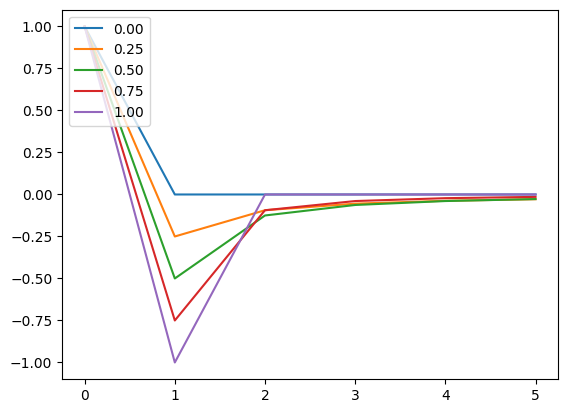

In [3]:
plotWeights(dRange=[0, 1], nPlots=5, size=6)

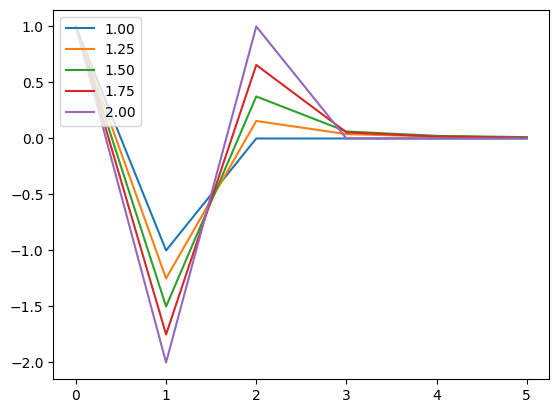

In [4]:
plotWeights(dRange=[1, 2], nPlots=5, size=6)

# ------------------------------------------------------------------

## 1.	Generate a time series from an IID Gaussian random process. 

This is a memoryless,stationary series:

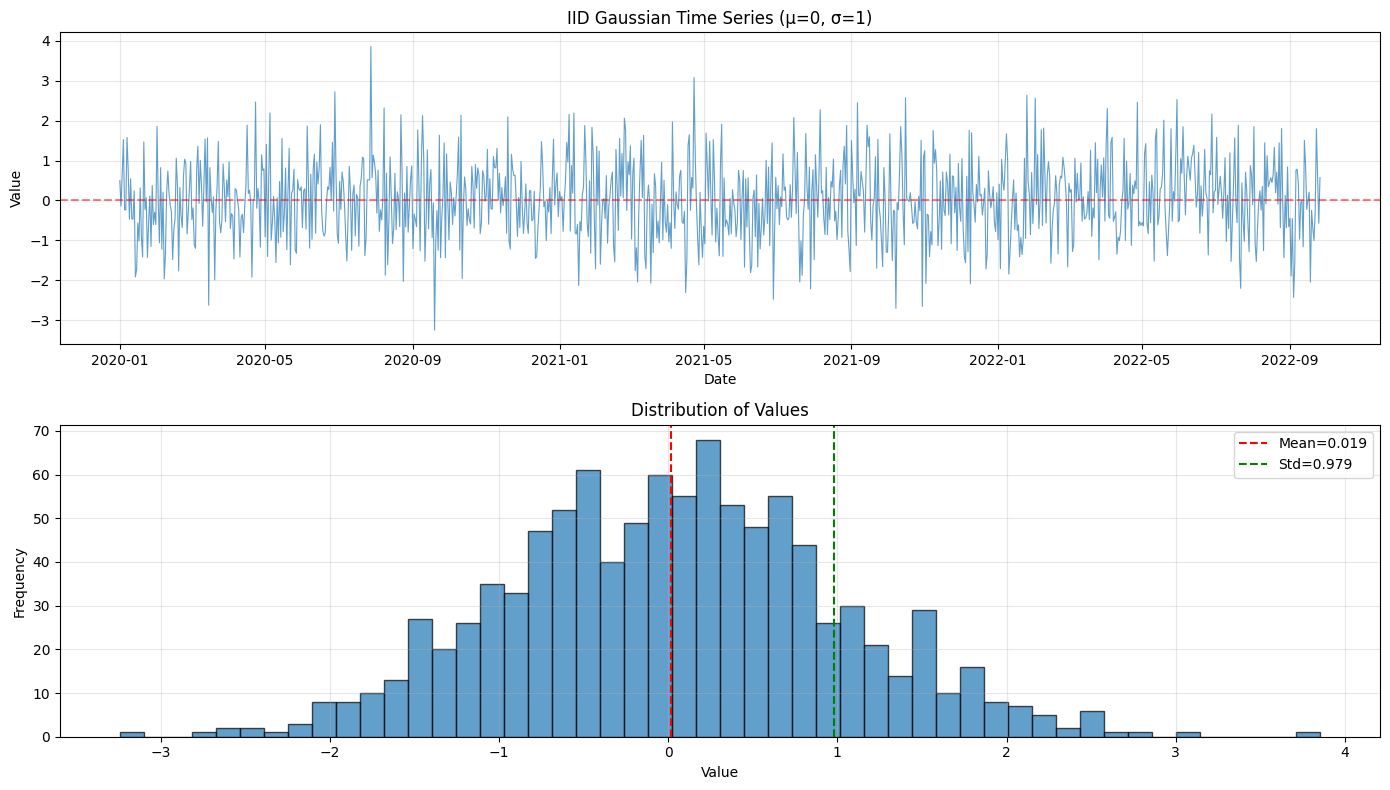

Statistics of IID Gaussian Series:
Mean: 0.0193
Std Dev: 0.9792
Min: -3.2413
Max: 3.8527


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate IID Gaussian random process
n = 1000  # number of observations
mu = 0    # mean
sigma = 1 # standard deviation

# Generate the IID Gaussian series
iid_gaussian = np.random.normal(loc=mu, scale=sigma, size=n)

# Convert to pandas Series with datetime index
date_range = pd.date_range(start='2020-01-01', periods=n, freq='D')
iid_series = pd.Series(iid_gaussian, index=date_range, name='IID Gaussian')

# Plot the series
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Time series plot
axes[0].plot(iid_series.index, iid_series.values, linewidth=0.8, alpha=0.7)
axes[0].set_title(f'IID Gaussian Time Series (μ={mu}, σ={sigma})')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(iid_series.values, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Values')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x=iid_series.mean(), color='r', linestyle='--', 
                label=f'Mean={iid_series.mean():.3f}')
axes[1].axvline(x=iid_series.std(), color='g', linestyle='--', 
                label=f'Std={iid_series.std():.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Statistics of IID Gaussian Series:")
print(f"Mean: {iid_series.mean():.4f}")
print(f"Std Dev: {iid_series.std():.4f}")
print(f"Min: {iid_series.min():.4f}")
print(f"Max: {iid_series.max():.4f}")

## (a)	Compute the ADF statistic on this series. 

What is the p-value?

In [6]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on IID series
adf_result = adfuller(iid_series, autolag='AIC')

# Extract results
adf_statistic = adf_result[0]
p_value = adf_result[1]
used_lag = adf_result[2]
nobs = adf_result[3]
critical_values = adf_result[4]

# Print results
print("="*60)
print("Augmented Dickey-Fuller Test Results")
print("="*60)
print(f"ADF Statistic: {adf_statistic:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Number of lags used: {used_lag}")
print(f"Number of observations: {nobs}")
print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value:.4f}")

print("\n" + "="*60)
if p_value < 0.05:
    print("✓ STATIONARY: Reject null hypothesis (p < 0.05)")
    print("  The series is stationary")
else:
    print("✗ NON-STATIONARY: Fail to reject null hypothesis (p >= 0.05)")
    print("  The series has a unit root (non-stationary)")
print("="*60)

Augmented Dickey-Fuller Test Results
ADF Statistic: -31.811094
P-value: 0.000000
Number of lags used: 0
Number of observations: 999

Critical Values:
  1%: -3.4369
  5%: -2.8644
  10%: -2.5683

✓ STATIONARY: Reject null hypothesis (p < 0.05)
  The series is stationary


## P-value: 0.000000

## (b)	Compute the cumulative sum of the observations. 

This is a non-stationary serieswithout memory.

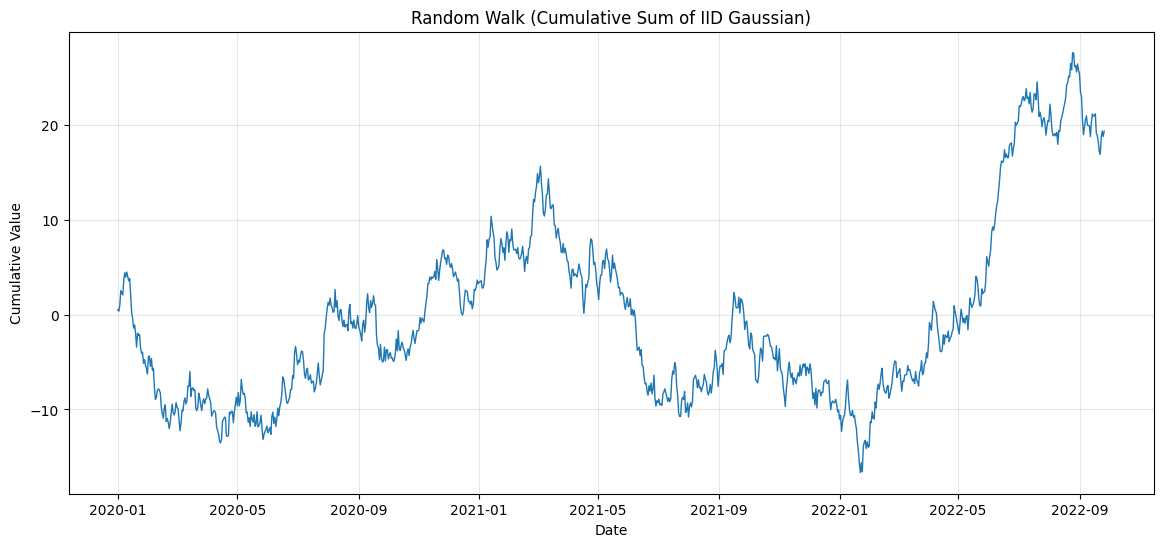

In [7]:
# Create a random walk from the IID process
random_walk = pd.Series(np.cumsum(iid_gaussian), index=date_range, name='Random Walk')

plt.figure(figsize=(14, 6))
plt.plot(random_walk.index, random_walk.values, linewidth=1)
plt.title('Random Walk (Cumulative Sum of IID Gaussian)')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.grid(True, alpha=0.3)
plt.show()

## i.	What is the order of integration of this cumulative series?

## ii.	Compute the ADF statistic on this series. What is the p-value?

In [8]:
# Test random_walk for stationarity
print("="*60)
print("ADF Test on Random Walk (Original Series)")
print("="*60)
adf_rw = adfuller(random_walk, autolag='AIC')
print(f"ADF Statistic: {adf_rw[0]:.6f}")
print(f"P-value: {adf_rw[1]:.6f}")
if adf_rw[1] < 0.05:
    print("✓ STATIONARY")
else:
    print("✗ NON-STATIONARY (has unit root)")

# Test first difference of random_walk
print("\n" + "="*60)
print("ADF Test on First Difference of Random Walk")
print("="*60)
random_walk_diff = random_walk.diff().dropna()
adf_rw_diff = adfuller(random_walk_diff, autolag='AIC')
print(f"ADF Statistic: {adf_rw_diff[0]:.6f}")
print(f"P-value: {adf_rw_diff[1]:.6f}")
if adf_rw_diff[1] < 0.05:
    print("✓ STATIONARY")
else:
    print("✗ NON-STATIONARY (has unit root)")

print("\n" + "="*60)
print("CONCLUSION:")
print("Random walk is I(1) - requires 1 difference to achieve stationarity")
print("="*60)

ADF Test on Random Walk (Original Series)
ADF Statistic: -0.965952
P-value: 0.765479
✗ NON-STATIONARY (has unit root)

ADF Test on First Difference of Random Walk
ADF Statistic: -31.789311
P-value: 0.000000
✓ STATIONARY

CONCLUSION:
Random walk is I(1) - requires 1 difference to achieve stationarity


# ------------------------------------------------------------------

## (c)	Differentiate the series twice. 

What is the p-value of this over-differentiated series?

ADF Test on Twice-Differentiated Random Walk
ADF Statistic: -11.536559
P-value: 0.000000
Number of lags used: 21
Number of observations: 976

Critical Values:
  1%: -3.4371
  5%: -2.8645
  10%: -2.5683

✓ STATIONARY: Reject null hypothesis (p < 0.05)

INTERPRETATION:
Random walk needs only 1 difference to be stationary (it's I(1))
The second difference is over-differentiation.
The twice-differentiated series is still stationary, but now has
induced negative autocorrelation (moving average structure).


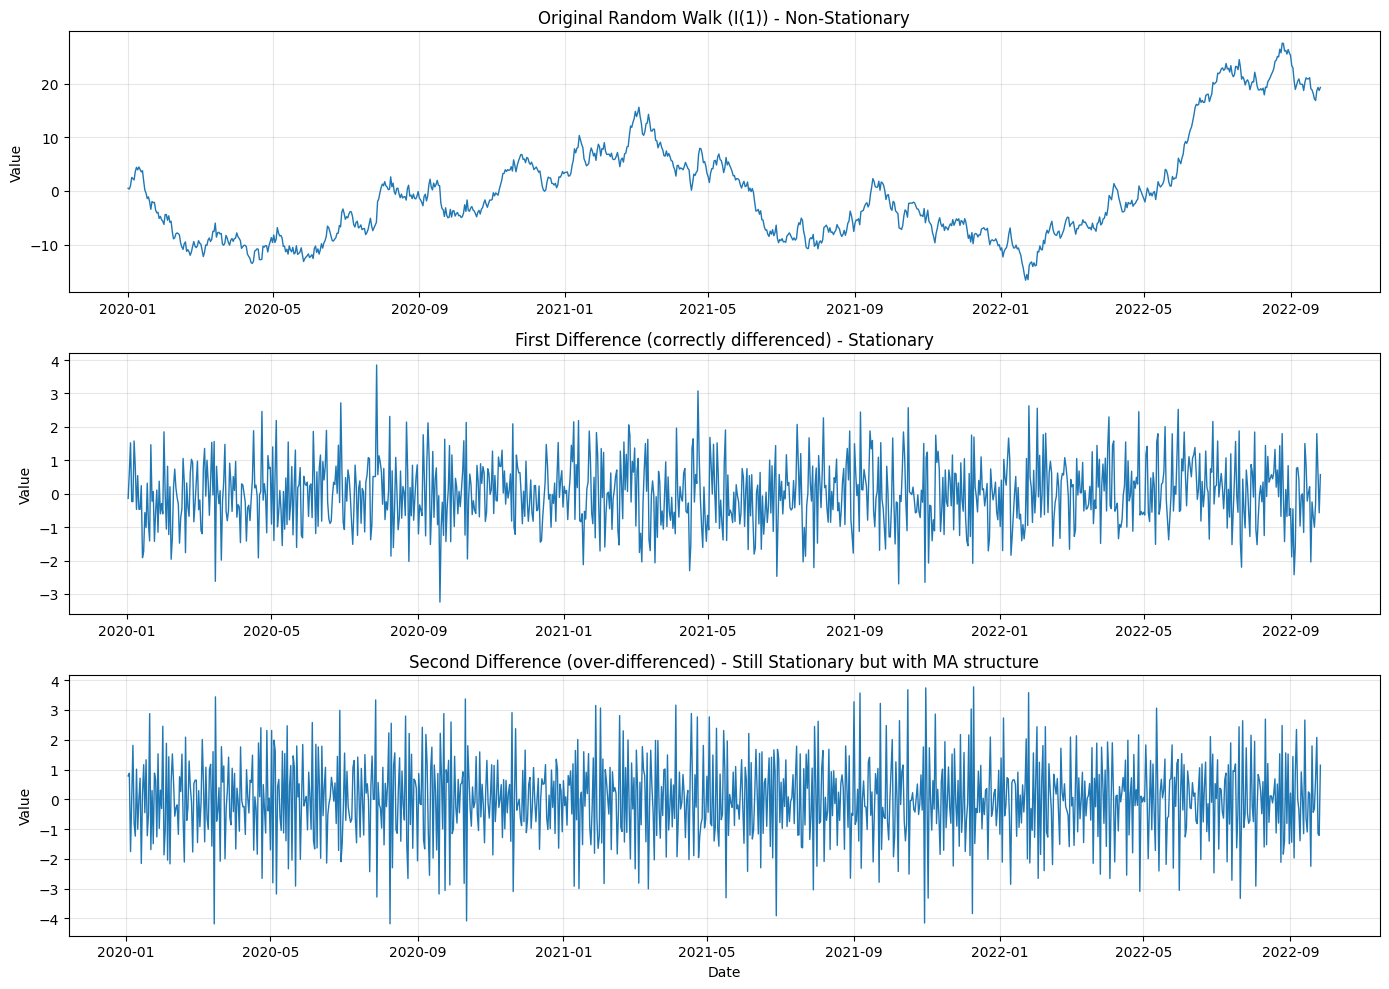

In [9]:
# Differentiate random_walk twice (over-differentiation)
random_walk_diff2 = random_walk.diff().diff().dropna()

# Perform ADF test on the twice-differentiated series
print("="*60)
print("ADF Test on Twice-Differentiated Random Walk")
print("="*60)
adf_diff2 = adfuller(random_walk_diff2, autolag='AIC')

print(f"ADF Statistic: {adf_diff2[0]:.6f}")
print(f"P-value: {adf_diff2[1]:.6f}")
print(f"Number of lags used: {adf_diff2[2]}")
print(f"Number of observations: {adf_diff2[3]}")
print("\nCritical Values:")
for key, value in adf_diff2[4].items():
    print(f"  {key}: {value:.4f}")

print("\n" + "="*60)
if adf_diff2[1] < 0.05:
    print("✓ STATIONARY: Reject null hypothesis (p < 0.05)")
else:
    print("✗ NON-STATIONARY: Fail to reject null hypothesis (p >= 0.05)")
print("="*60)

print("\nINTERPRETATION:")
print("Random walk needs only 1 difference to be stationary (it's I(1))")
print("The second difference is over-differentiation.")
print("The twice-differentiated series is still stationary, but now has")
print("induced negative autocorrelation (moving average structure).")

# Plot to visualize
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(random_walk.index, random_walk.values, linewidth=1)
axes[0].set_title('Original Random Walk (I(1)) - Non-Stationary')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

axes[1].plot(random_walk_diff.index, random_walk_diff.values, linewidth=1)
axes[1].set_title('First Difference (correctly differenced) - Stationary')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

axes[2].plot(random_walk_diff2.index, random_walk_diff2.values, linewidth=1)
axes[2].set_title('Second Difference (over-differenced) - Still Stationary but with MA structure')
axes[2].set_ylabel('Value')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

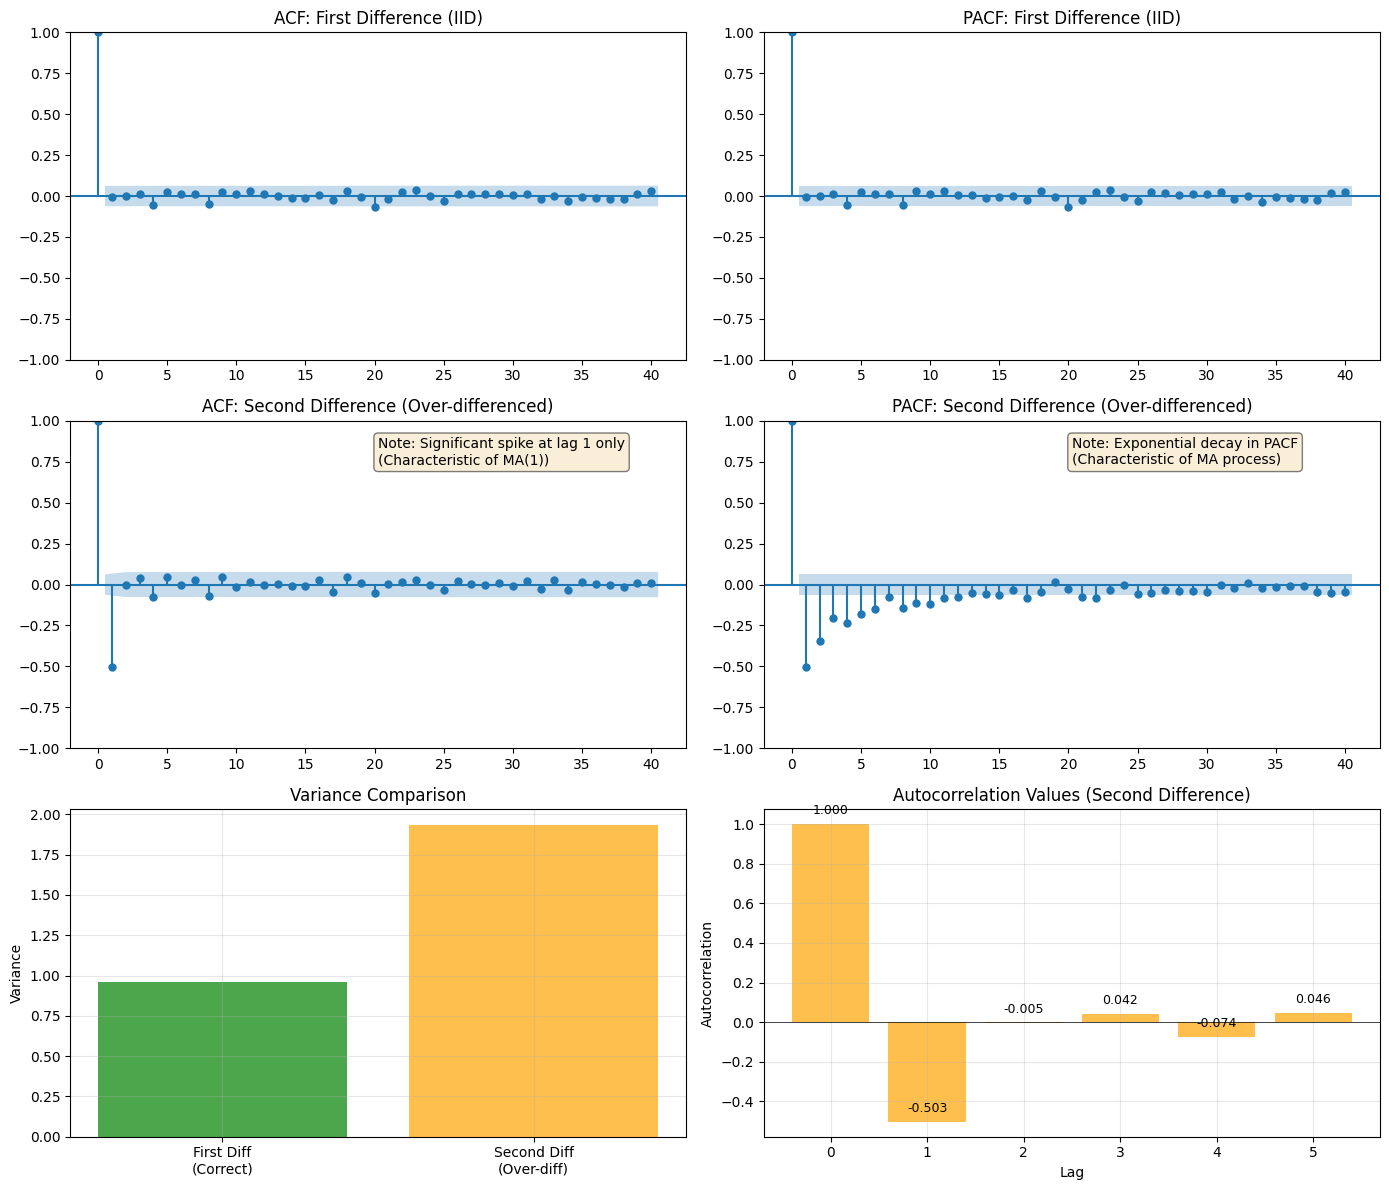

DEMONSTRATION OF MA(1) STRUCTURE

Autocorrelation at different lags:
  Lag 0: 1.000000
  Lag 1: -0.503096
  Lag 2: -0.004802
  Lag 3: 0.041976
  Lag 4: -0.073674
  Lag 5: 0.046255

KEY OBSERVATIONS:
1. ACF shows significant spike at lag 1 ONLY
2. PACF shows exponential decay (characteristic of MA process)
3. This is the signature of an MA(1) process
4. Variance increased: 0.9596 → 1.9350

WHY? The second difference creates:
  Δ²X_t = ΔX_t - ΔX_{t-1} = ε_t - ε_{t-1}
  This is exactly the MA(1) model with θ = -1


In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf

# Compare ACF/PACF of both series
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Original IID series (first difference) - should show no autocorrelation
plot_acf(random_walk_diff, lags=40, ax=axes[0, 0], title='ACF: First Difference (IID)')
plot_pacf(random_walk_diff, lags=40, method='ywm', ax=axes[0, 1], title='PACF: First Difference (IID)')

# Second difference - should show MA(1) structure
plot_acf(random_walk_diff2, lags=40, ax=axes[1, 0], title='ACF: Second Difference (Over-differenced)')
plot_pacf(random_walk_diff2, lags=40, method='ywm', ax=axes[1, 1], title='PACF: Second Difference (Over-differenced)')

# Add annotations ACF
axes[1, 0].text(0.5, 0.95, 'Note: Significant spike at lag 1 only\n(Characteristic of MA(1))', 
                transform=axes[1, 0].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add annotations PACF
axes[1, 1].text(0.5, 0.95, 'Note: Exponential decay in PACF\n(Characteristic of MA process)', 
                transform=axes[1, 1].transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Compare variance
axes[2, 0].bar(['First Diff\n(Correct)', 'Second Diff\n(Over-diff)'], 
               [random_walk_diff.var(), random_walk_diff2.var()],
               color=['green', 'orange'], alpha=0.7)
axes[2, 0].set_ylabel('Variance')
axes[2, 0].set_title('Variance Comparison')
axes[2, 0].grid(True, alpha=0.3)

# Show autocorrelation values
acf_values = acf(random_walk_diff2, nlags=5)
axes[2, 1].bar(range(len(acf_values)), acf_values, alpha=0.7, color='orange')
axes[2, 1].set_xlabel('Lag')
axes[2, 1].set_ylabel('Autocorrelation')
axes[2, 1].set_title('Autocorrelation Values (Second Difference)')
axes[2, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[2, 1].grid(True, alpha=0.3)

for i, v in enumerate(acf_values):
    axes[2, 1].text(i, v + 0.05, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print numerical evidence
print("="*60)
print("DEMONSTRATION OF MA(1) STRUCTURE")
print("="*60)
print("\nAutocorrelation at different lags:")
acf_vals = acf(random_walk_diff2, nlags=10)
for lag in range(6):
    print(f"  Lag {lag}: {acf_vals[lag]:.6f}")

print("\nKEY OBSERVATIONS:")
print("1. ACF shows significant spike at lag 1 ONLY")
print("2. PACF shows exponential decay (characteristic of MA process)")
print("3. This is the signature of an MA(1) process")
print(f"4. Variance increased: {random_walk_diff.var():.4f} → {random_walk_diff2.var():.4f}")
print("\nWHY? The second difference creates:")
print("  Δ²X_t = ΔX_t - ΔX_{t-1} = ε_t - ε_{t-1}")
print("  This is exactly the MA(1) model with θ = -1")
print("="*60)

# ------------------------------------------------------------------

## 2.	Generate a time series that follows a sinusoidal function. 

This is a stationary series with memory.

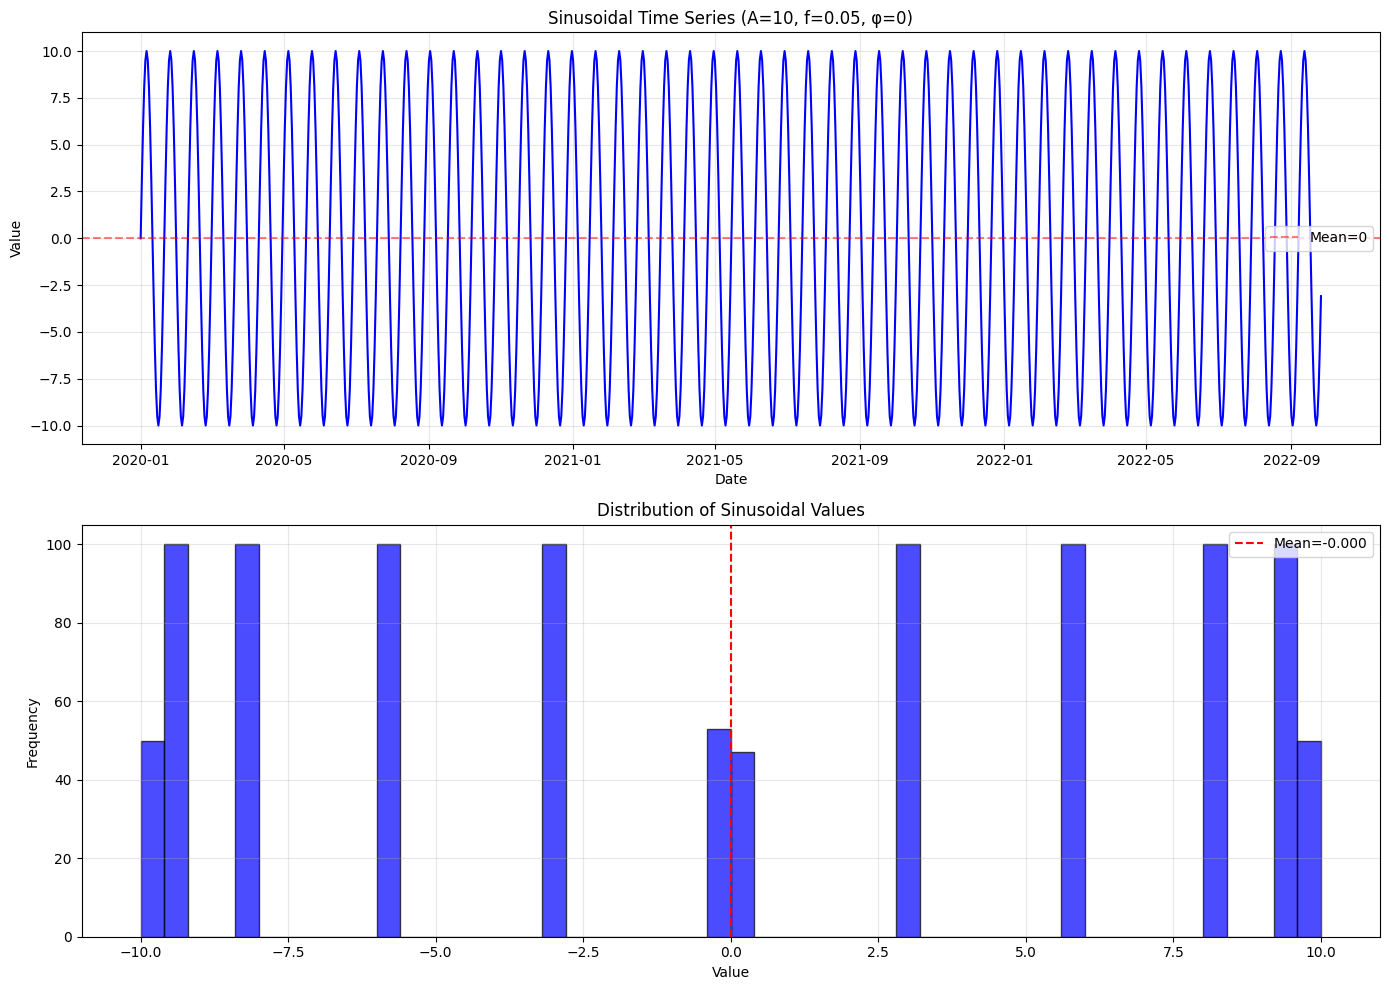

Statistics of Sinusoidal Series:
Mean: -0.0000
Std Dev: 7.0746
Min: -10.0000
Max: 10.0000
Amplitude (theoretical): 10
Amplitude (observed): 10.0000


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n = 1000  # number of observations
amplitude = 10  # amplitude of the sine wave
frequency = 0.05  # frequency (controls how many cycles)
phase = 0  # phase shift
vertical_shift = 0  # vertical shift (mean level)

# Generate time points
t = np.arange(n)

# Generate sinusoidal series
sinusoidal_series = amplitude * np.sin(2 * np.pi * frequency * t + phase) + vertical_shift

# Convert to pandas Series with datetime index
date_range = pd.date_range(start='2020-01-01', periods=n, freq='D')
sin_series = pd.Series(sinusoidal_series, index=date_range, name='Sinusoidal Series')

# Plot the series
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Time series plot
axes[0].plot(sin_series.index, sin_series.values, linewidth=1.5, color='blue')
axes[0].set_title(f'Sinusoidal Time Series (A={amplitude}, f={frequency}, φ={phase})')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].axhline(y=vertical_shift, color='r', linestyle='--', alpha=0.5, label=f'Mean={vertical_shift}')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Distribution plot
axes[1].hist(sin_series.values, bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[1].set_title('Distribution of Sinusoidal Values')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x=sin_series.mean(), color='r', linestyle='--', 
                label=f'Mean={sin_series.mean():.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Statistics of Sinusoidal Series:")
print(f"Mean: {sin_series.mean():.4f}")
print(f"Std Dev: {sin_series.std():.4f}")
print(f"Min: {sin_series.min():.4f}")
print(f"Max: {sin_series.max():.4f}")
print(f"Amplitude (theoretical): {amplitude}")
print(f"Amplitude (observed): {(sin_series.max() - sin_series.min()) / 2:.4f}")

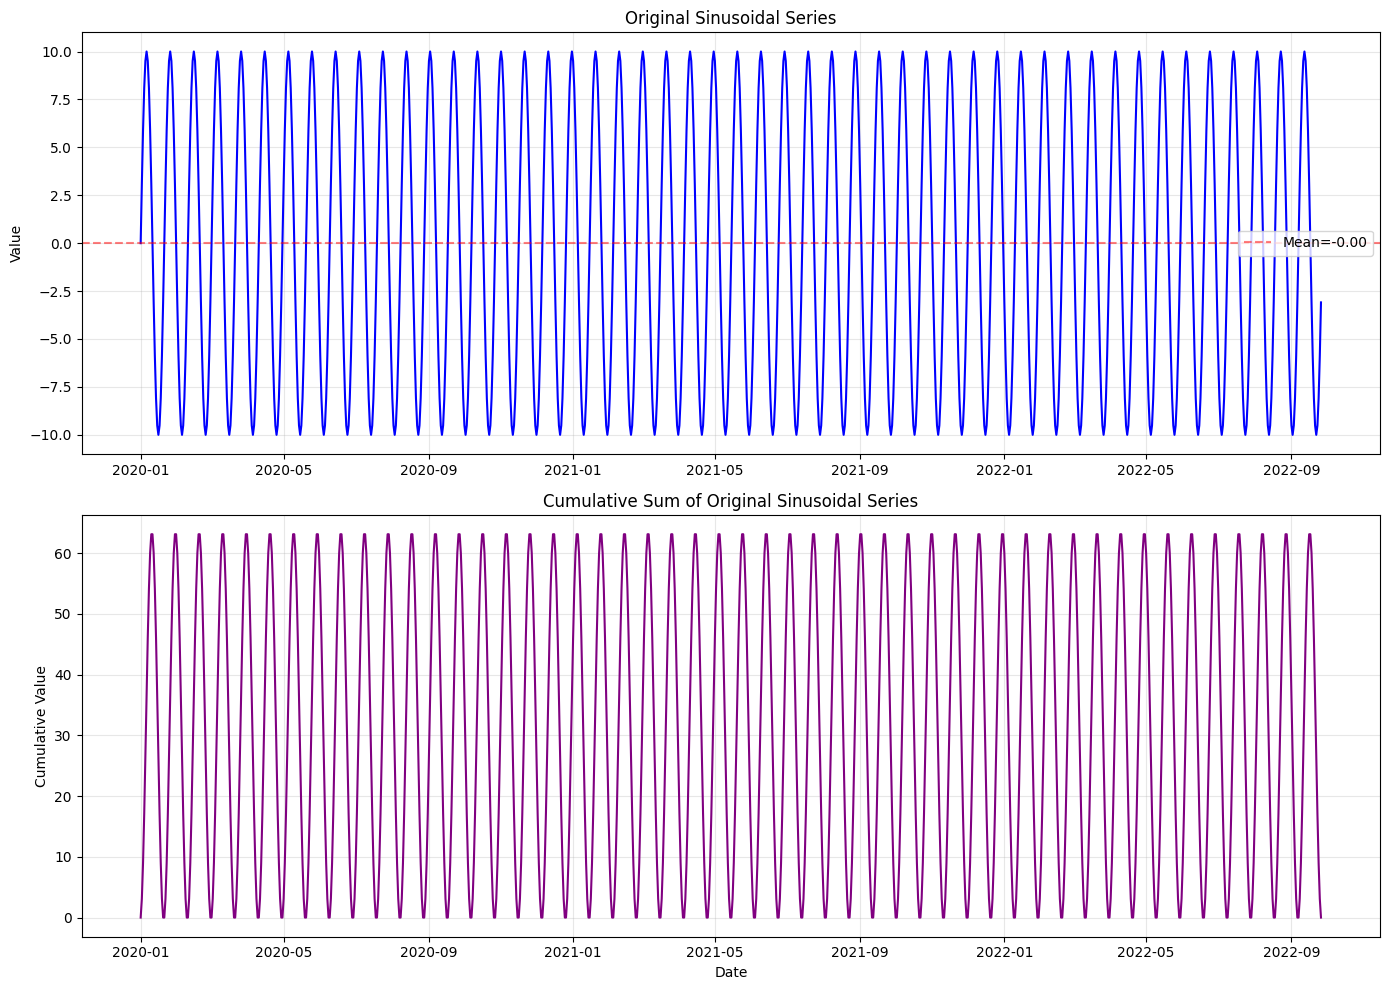

CUMULATIVE SUM OF ORIGINAL SINUSOIDAL SERIES
Starting value: 0.0000
Ending value: -0.0000
Total change: -0.0000
Mean: 31.5688
Std Dev: 22.6120


In [12]:
# Compute cumulative sum of the original sinusoidal series (without shift)
sin_series_cumsum_original = sin_series.cumsum()

# Create a focused plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Original sinusoidal series
axes[0].plot(sin_series.index, sin_series.values, linewidth=1.5, color='blue')
axes[0].set_title('Original Sinusoidal Series')
axes[0].set_ylabel('Value')
axes[0].axhline(y=sin_series.mean(), color='r', linestyle='--', alpha=0.5, 
                label=f'Mean={sin_series.mean():.2f}')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Cumulative sum of original sinusoidal series
axes[1].plot(sin_series_cumsum_original.index, sin_series_cumsum_original.values, 
             linewidth=1.5, color='purple')
axes[1].set_title('Cumulative Sum of Original Sinusoidal Series')
axes[1].set_ylabel('Cumulative Value')
axes[1].set_xlabel('Date')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("="*60)
print("CUMULATIVE SUM OF ORIGINAL SINUSOIDAL SERIES")
print("="*60)
print(f"Starting value: {sin_series_cumsum_original.iloc[0]:.4f}")
print(f"Ending value: {sin_series_cumsum_original.iloc[-1]:.4f}")
print(f"Total change: {sin_series_cumsum_original.iloc[-1] - sin_series_cumsum_original.iloc[0]:.4f}")
print(f"Mean: {sin_series_cumsum_original.mean():.4f}")
print(f"Std Dev: {sin_series_cumsum_original.std():.4f}")
print("="*60)

## (a)	Compute the ADF statistic on this series. What is the p-value?

In [13]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on sinusoidal series
print("="*60)
print("Augmented Dickey-Fuller Test on Sinusoidal Series")
print("="*60)
adf_sin = adfuller(sin_series, autolag='AIC')

print(f"ADF Statistic: {adf_sin[0]:.6f}")
print(f"P-value: {adf_sin[1]:.6f}")
print(f"Number of lags used: {adf_sin[2]}")
print(f"Number of observations: {adf_sin[3]}")
print("\nCritical Values:")
for key, value in adf_sin[4].items():
    print(f"  {key}: {value:.4f}")

print("\n" + "="*60)
if adf_sin[1] < 0.05:
    print("✓ STATIONARY: Reject null hypothesis (p < 0.05)")
    print("  The series is stationary")
else:
    print("✗ NON-STATIONARY: Fail to reject null hypothesis (p >= 0.05)")
    print("  The series appears to have a unit root (non-stationary)")
print("="*60)

Augmented Dickey-Fuller Test on Sinusoidal Series
ADF Statistic: -133114413289403.812500
P-value: 0.000000
Number of lags used: 1
Number of observations: 998

Critical Values:
  1%: -3.4369
  5%: -2.8644
  10%: -2.5683

✓ STATIONARY: Reject null hypothesis (p < 0.05)
  The series is stationary


### P-value: 0.000000

# ------------------------------------------------------------------

## (b)	Shift every observation by the same positive value. Compute the cumulative sumof the observations. This is a non-stationary series with memory.

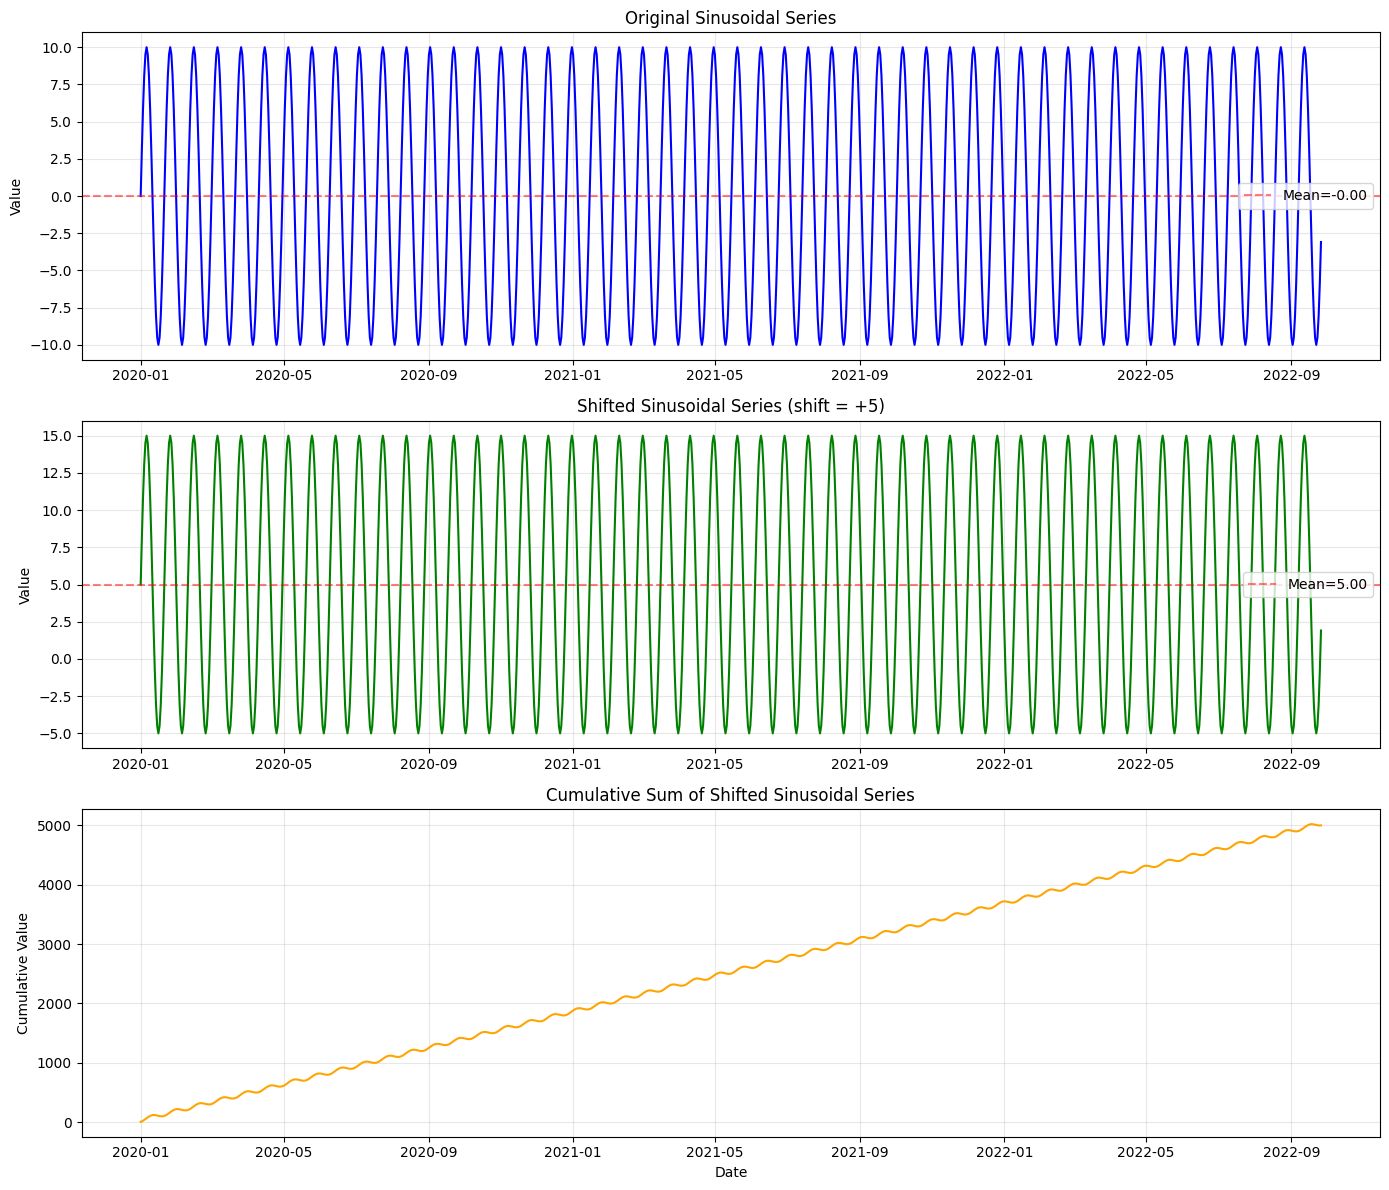

STATISTICS COMPARISON

Original Series:
  Mean: -0.0000
  Std Dev: 7.0746

Shifted Series (shift = +5):
  Mean: 5.0000
  Std Dev: 7.0746

Cumulative Sum of Shifted Series:
  Starting value: 5.0000
  Ending value: 5000.0000
  Total change: 4995.0000
  Mean: 2534.0688


In [14]:
# Shift sin_series by a positive value and compute cumulative sum
shift_value = 5  # positive shift

# Shift the series
sin_series_shifted = sin_series + shift_value

# Compute cumulative sum
sin_series_cumsum = sin_series_shifted.cumsum()

# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Original sinusoidal series
axes[0].plot(sin_series.index, sin_series.values, linewidth=1.5, color='blue')
axes[0].set_title('Original Sinusoidal Series')
axes[0].set_ylabel('Value')
axes[0].axhline(y=sin_series.mean(), color='r', linestyle='--', alpha=0.5, 
                label=f'Mean={sin_series.mean():.2f}')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Shifted sinusoidal series
axes[1].plot(sin_series_shifted.index, sin_series_shifted.values, linewidth=1.5, color='green')
axes[1].set_title(f'Shifted Sinusoidal Series (shift = +{shift_value})')
axes[1].set_ylabel('Value')
axes[1].axhline(y=sin_series_shifted.mean(), color='r', linestyle='--', alpha=0.5, 
                label=f'Mean={sin_series_shifted.mean():.2f}')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Cumulative sum of shifted series
axes[2].plot(sin_series_cumsum.index, sin_series_cumsum.values, linewidth=1.5, color='orange')
axes[2].set_title('Cumulative Sum of Shifted Sinusoidal Series')
axes[2].set_ylabel('Cumulative Value')
axes[2].set_xlabel('Date')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("="*60)
print("STATISTICS COMPARISON")
print("="*60)
print(f"\nOriginal Series:")
print(f"  Mean: {sin_series.mean():.4f}")
print(f"  Std Dev: {sin_series.std():.4f}")

print(f"\nShifted Series (shift = +{shift_value}):")
print(f"  Mean: {sin_series_shifted.mean():.4f}")
print(f"  Std Dev: {sin_series_shifted.std():.4f}")

print(f"\nCumulative Sum of Shifted Series:")
print(f"  Starting value: {sin_series_cumsum.iloc[0]:.4f}")
print(f"  Ending value: {sin_series_cumsum.iloc[-1]:.4f}")
print(f"  Total change: {sin_series_cumsum.iloc[-1] - sin_series_cumsum.iloc[0]:.4f}")
print(f"  Mean: {sin_series_cumsum.mean():.4f}")
print("="*60)

# ------------------------------------------------------------------

### i.	Compute the ADF statistic on this series. What is the p-value?

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on cumulative sum of shifted sinusoidal series
print("="*60)
print("Augmented Dickey-Fuller Test on Cumulative Sum Series")
print("="*60)
adf_cumsum = adfuller(sin_series_cumsum, autolag='AIC')

print(f"ADF Statistic: {adf_cumsum[0]:.6f}")
print(f"P-value: {adf_cumsum[1]:.6f}")
print(f"Number of lags used: {adf_cumsum[2]}")
print(f"Number of observations: {adf_cumsum[3]}")
print("\nCritical Values:")
for key, value in adf_cumsum[4].items():
    print(f"  {key}: {value:.4f}")

print("\n" + "="*60)
if adf_cumsum[1] < 0.05:
    print("✓ STATIONARY: Reject null hypothesis (p < 0.05)")
    print("  The series is stationary")
else:
    print("✗ NON-STATIONARY: Fail to reject null hypothesis (p >= 0.05)")
    print("  The series has a unit root (non-stationary)")
print("="*60)

Augmented Dickey-Fuller Test on Cumulative Sum Series
ADF Statistic: -4.920541
P-value: 0.000032
Number of lags used: 18
Number of observations: 981

Critical Values:
  1%: -3.4370
  5%: -2.8645
  10%: -2.5683

✓ STATIONARY: Reject null hypothesis (p < 0.05)
  The series is stationary


### This is at variance to reality as the series "sin_series_cumsum" is obviously non-stationary

# ------------------------------------------------------------------

## ii.	Apply an expanding window fracdiff, with τ = 1E −2. 

For what minimum d value do you get a p-value below 5%?

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def getWeights_FFD(d, thres):
    """
    Compute weights for fractional differencing with threshold
    thres: threshold to drop insignificant weights
    """
    w = [1.]
    k = 1
    while True:
        w_ = -w[-1] * (d - k + 1) / k
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
    w = np.array(w[::-1]).reshape(-1, 1)
    return w

def fracDiff_FFD(series, d, thres=1e-2):
    """
    Apply expanding window fractional differencing
    series: pd.Series to difference
    d: differencing order
    thres: threshold for weight truncation
    """
    # Get weights
    w = getWeights_FFD(d, thres)
    width = len(w) - 1
    
    # Initialize output series
    df = {}
    
    # Apply expanding window
    for iloc in range(width, series.shape[0]):
        loc = series.index[iloc]
        # Use available history up to width
        if iloc < width:
            continue
        # Get window of data
        series_window = series.iloc[iloc-width:iloc+1].values
        # Apply weights (reversed to match chronological order)
        df[loc] = np.dot(w.T, series_window.reshape(-1, 1))[0, 0]
    
    df = pd.Series(df)
    return df

# Test different d values to find minimum d where p-value < 0.05
thres = 1e-2
d_values = np.arange(0.0, 2.0, 0.1)

results = []

print("="*80)
print("FRACTIONAL DIFFERENCING OF sin_series_cumsum")
print(f"Threshold τ = {thres}")
print("="*80)
print(f"\n{'d Value':<10} {'ADF Stat':<15} {'P-Value':<15} {'Stationary?':<15}")
print("-"*80)

min_d_stationary = None

for d in d_values:
    # Apply fractional differencing
    series_frac = fracDiff_FFD(sin_series_cumsum, d, thres=thres)
    
    # Perform ADF test
    try:
        adf_result = adfuller(series_frac.dropna(), autolag='AIC')
        adf_stat = adf_result[0]
        p_value = adf_result[1]
        is_stationary = "YES" if p_value < 0.05 else "NO"
        
        results.append({
            'd': d,
            'adf_stat': adf_stat,
            'p_value': p_value,
            'stationary': is_stationary
        })
        
        print(f"{d:<10.2f} {adf_stat:<15.6f} {p_value:<15.6f} {is_stationary:<15}")
        
        # Track minimum d where series becomes stationary
        if p_value < 0.05 and min_d_stationary is None:
            min_d_stationary = d
            
    except Exception as e:
        print(f"{d:<10.2f} {'ERROR':<15} {'ERROR':<15} {'ERROR':<15}")

print("="*80)
if min_d_stationary is not None:
    print(f"\n✓ MINIMUM d VALUE FOR STATIONARITY (p < 0.05): {min_d_stationary:.2f}")
else:
    print("\n✗ No d value in tested range achieved stationarity (p < 0.05)")
print("="*80)

# Create results DataFrame for easier viewing
results_df = pd.DataFrame(results)

FRACTIONAL DIFFERENCING OF sin_series_cumsum
Threshold τ = 0.01

d Value    ADF Stat        P-Value         Stationary?    
--------------------------------------------------------------------------------
0.00       -4.920541       0.000032        YES            
0.10       -6.736572       0.000000        YES            
0.20       -13.472723      0.000000        YES            
0.30       4.395818        1.000000        NO             
0.40       -14.269131      0.000000        YES            
0.50       1.266167        0.996413        NO             
0.60       1.843186        0.998431        NO             
0.70       0.044110        0.962031        NO             
0.80       0.117696        0.967249        NO             
0.90       0.945354        0.993655        NO             
1.00       -56660178108703.109375 0.000000        YES            
1.10       -0.108111       0.948625        NO             
1.20       0.009047        0.959274        NO             
1.30       -0.094904 

### For what minimum d value do you get a p-value below 5%

MINIMUM d VALUE FOR STATIONARITY (p < 0.05): 0.00

## I don't think this test is consistent - stationary for 0.2, not for 0.3, back to stationary for 0.4

## Look at some charts:

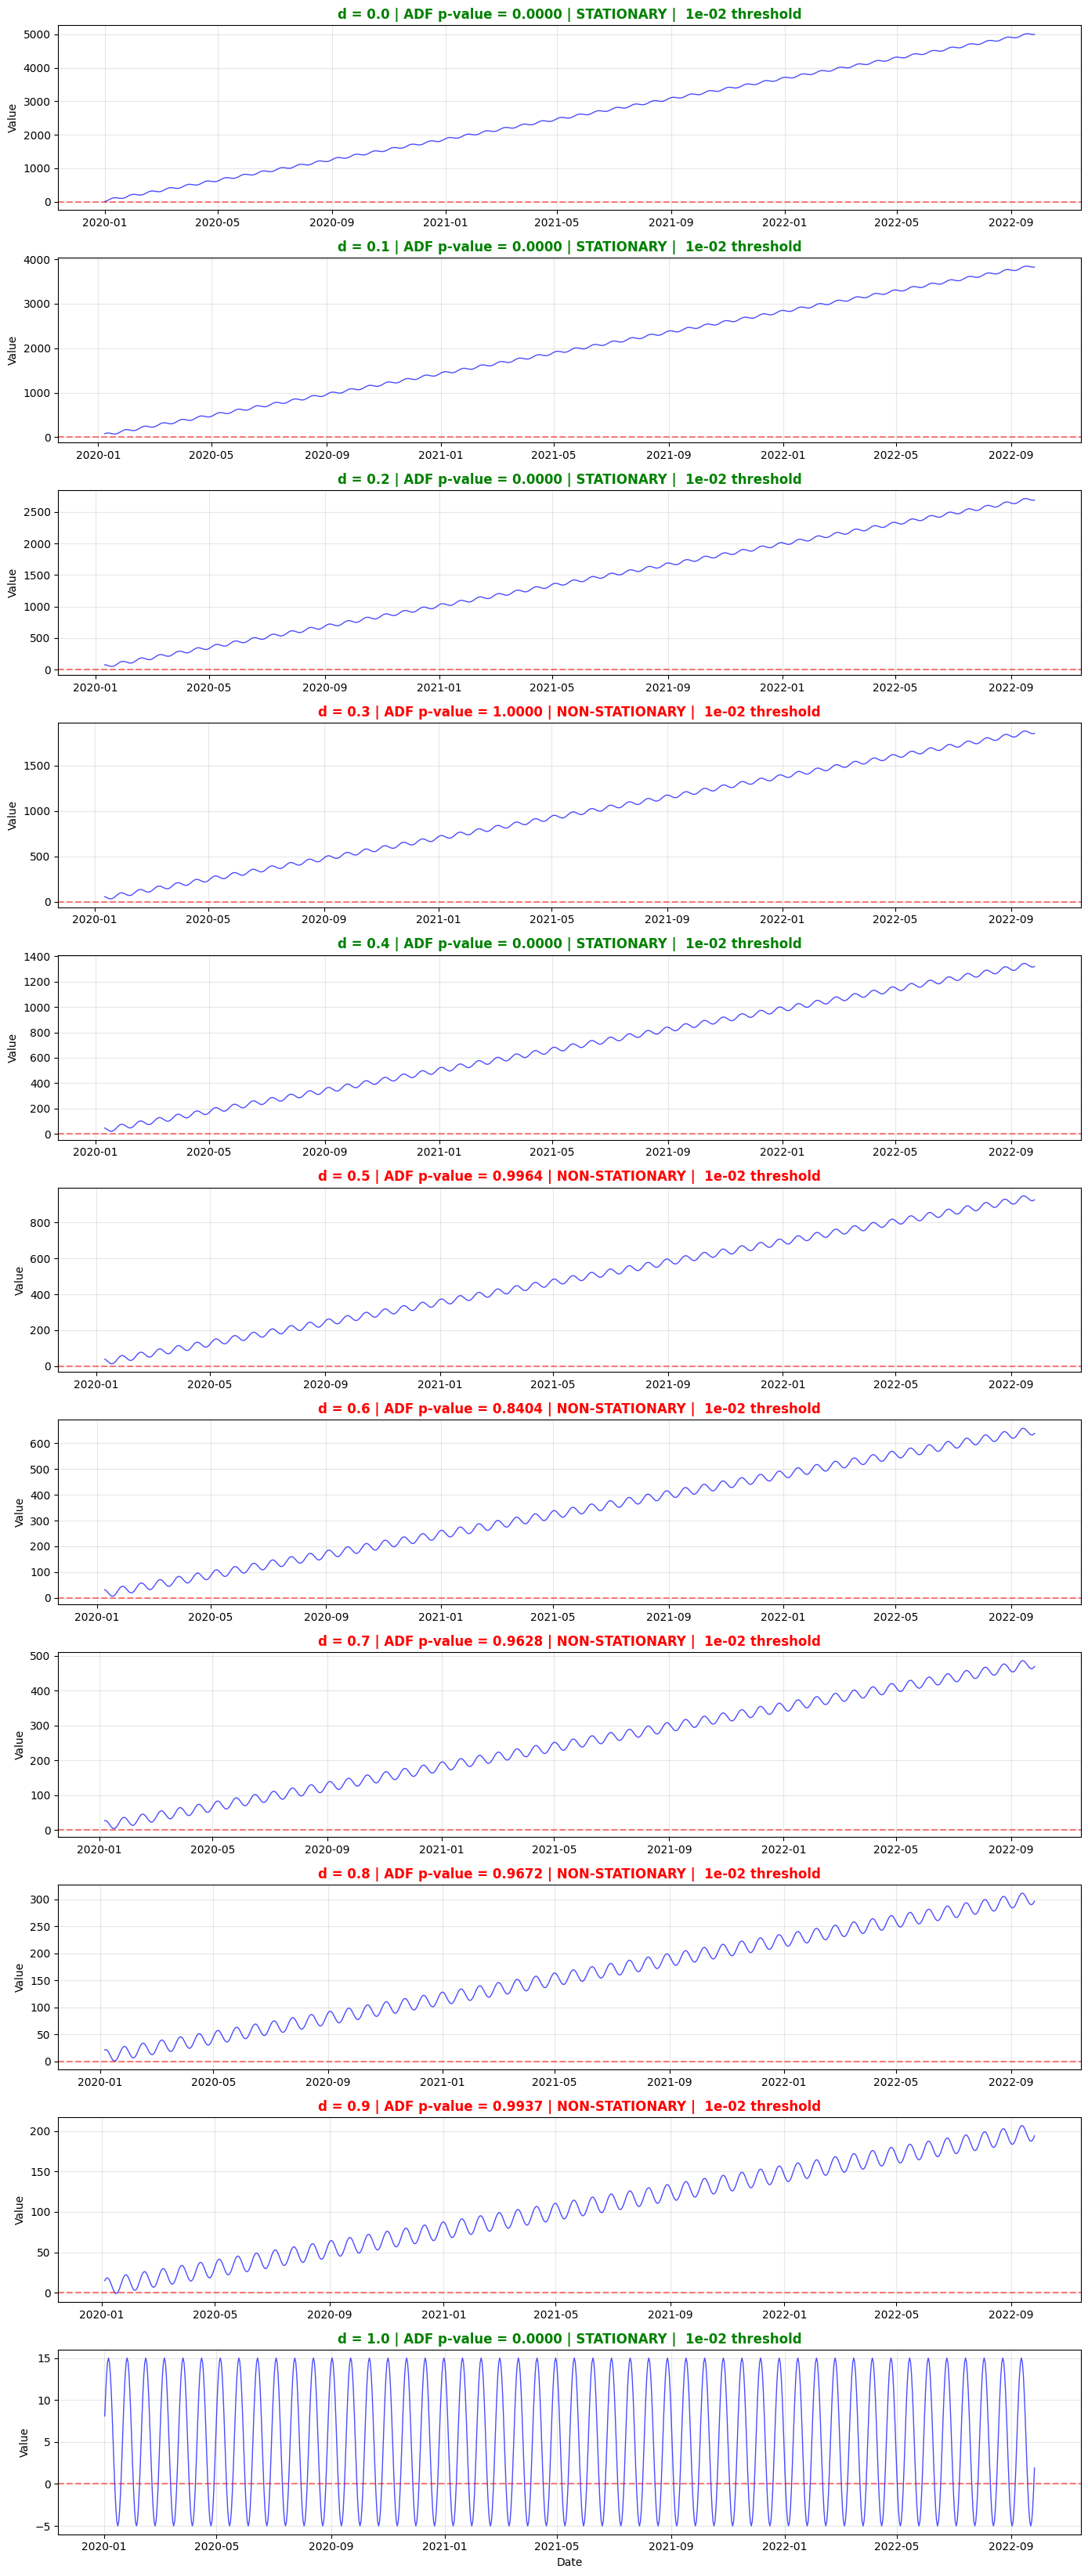

In [17]:
# Visualize fractionally differenced series at different d values
import matplotlib.pyplot as plt

# Select a few key d values to plot
d_values_to_plot = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
thres = 1e-2

fig, axes = plt.subplots(len(d_values_to_plot), 1, figsize=(14, 3 * len(d_values_to_plot)))

for i, d in enumerate(d_values_to_plot):
    # Apply fractional differencing
    series_frac = fracDiff_FFD(sin_series_cumsum, d, thres=thres)
    
    # Perform ADF test
    adf_result = adfuller(series_frac.dropna(), autolag='AIC')
    p_value = adf_result[1]
    
    # Plot
    axes[i].plot(series_frac.index, series_frac.values, linewidth=1, color='blue', alpha=0.7)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    
    # Color code title based on stationarity
    title_color = 'green' if p_value < 0.05 else 'red'
    status = 'STATIONARY' if p_value < 0.05 else 'NON-STATIONARY'
    axes[i].set_title(f'd = {d:.1f} | ADF p-value = {p_value:.4f} | {status} | {thres: .0e} threshold', 
                      color=title_color, fontweight='bold')
    
    if i == len(d_values_to_plot) - 1:
        axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------

## iii.	Apply FFD, with τ = 1E−5. 

For what minimum d value do you get a p-value below 5%?

Note: skipping 0 d_values = np.arange(0.1, 2.0, 0.1)

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

def getWeights_FFD(d, thres):
    """
    Compute weights for fractional differencing with threshold
    thres: threshold to drop insignificant weights
    """
    w = [1.]
    k = 1
    while True:
        w_ = -w[-1] * (d - k + 1) / k
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
    w = np.array(w[::-1]).reshape(-1, 1)
    return w

def fracDiff_FFD(series, d, thres=1e-5):
    """
    Apply expanding window fractional differencing
    series: pd.Series to difference
    d: differencing order
    thres: threshold for weight truncation
    """
    # Get weights
    w = getWeights_FFD(d, thres)
    width = len(w) - 1
    
    # Initialize output series
    df = {}
    
    # Apply expanding window
    for iloc in range(width, series.shape[0]):
        loc = series.index[iloc]
        # Use available history up to width
        if iloc < width:
            continue
        # Get window of data
        series_window = series.iloc[iloc-width:iloc+1].values
        # Apply weights (reversed to match chronological order)
        df[loc] = np.dot(w.T, series_window.reshape(-1, 1))[0, 0]
    
    df = pd.Series(df)
    return df

# Test different d values to find minimum d where p-value < 0.05
thres = 1e-5
d_values = np.arange(0.1, 2.0, 0.1)

results = []

print("="*80)
print("FRACTIONAL DIFFERENCING OF sin_series_cumsum")
print(f"Threshold τ = {thres}")
print("="*80)
print(f"\n{'d Value':<10} {'ADF Stat':<15} {'P-Value':<15} {'Stationary?':<15}")
print("-"*80)

min_d_stationary = None

for d in d_values:
    # Apply fractional differencing
    series_frac = fracDiff_FFD(sin_series_cumsum, d, thres=thres)
    
    # Perform ADF test
    try:
        adf_result = adfuller(series_frac.dropna(), autolag='AIC')
        adf_stat = adf_result[0]
        p_value = adf_result[1]
        is_stationary = "YES" if p_value < 0.05 else "NO"
        
        results.append({
            'd': d,
            'adf_stat': adf_stat,
            'p_value': p_value,
            'stationary': is_stationary
        })
        
        print(f"{d:<10.2f} {adf_stat:<15.6f} {p_value:<15.6f} {is_stationary:<15}")
        
        # Track minimum d where series becomes stationary
        if p_value < 0.05 and min_d_stationary is None:
            min_d_stationary = d
            
    except Exception as e:
        print(f"{d:<10.2f} {'ERROR':<15} {'ERROR':<15} {'ERROR':<15}")

print("="*80)
if min_d_stationary is not None:
    print(f"\n✓ MINIMUM d VALUE FOR STATIONARITY (p < 0.05): {min_d_stationary:.2f}")
else:
    print("\n✗ No d value in tested range achieved stationarity (p < 0.05)")
print("="*80)

# Create results DataFrame for easier viewing
results_df = pd.DataFrame(results)
print("\nSummary Statistics:")
print(results_df.describe())

FRACTIONAL DIFFERENCING OF sin_series_cumsum
Threshold τ = 1e-05

d Value    ADF Stat        P-Value         Stationary?    
--------------------------------------------------------------------------------
0.10       ERROR           ERROR           ERROR          
0.20       ERROR           ERROR           ERROR          
0.30       ERROR           ERROR           ERROR          
0.40       ERROR           ERROR           ERROR          
0.50       0.067203        0.963749        NO             
0.60       0.126140        0.967801        NO             
0.70       0.042134        0.961881        NO             
0.80       0.088715        0.965282        NO             
0.90       0.157740        0.969789        NO             
1.00       -56660178108703.109375 0.000000        YES            
1.10       -0.041556       0.954958        NO             
1.20       -0.089220       0.950502        NO             
1.30       -0.050224       0.954176        NO             
1.40       -0.057820

### Skipping d values 0.1 to 0.5


Skipping d values 0.1 - 0.5 Errors


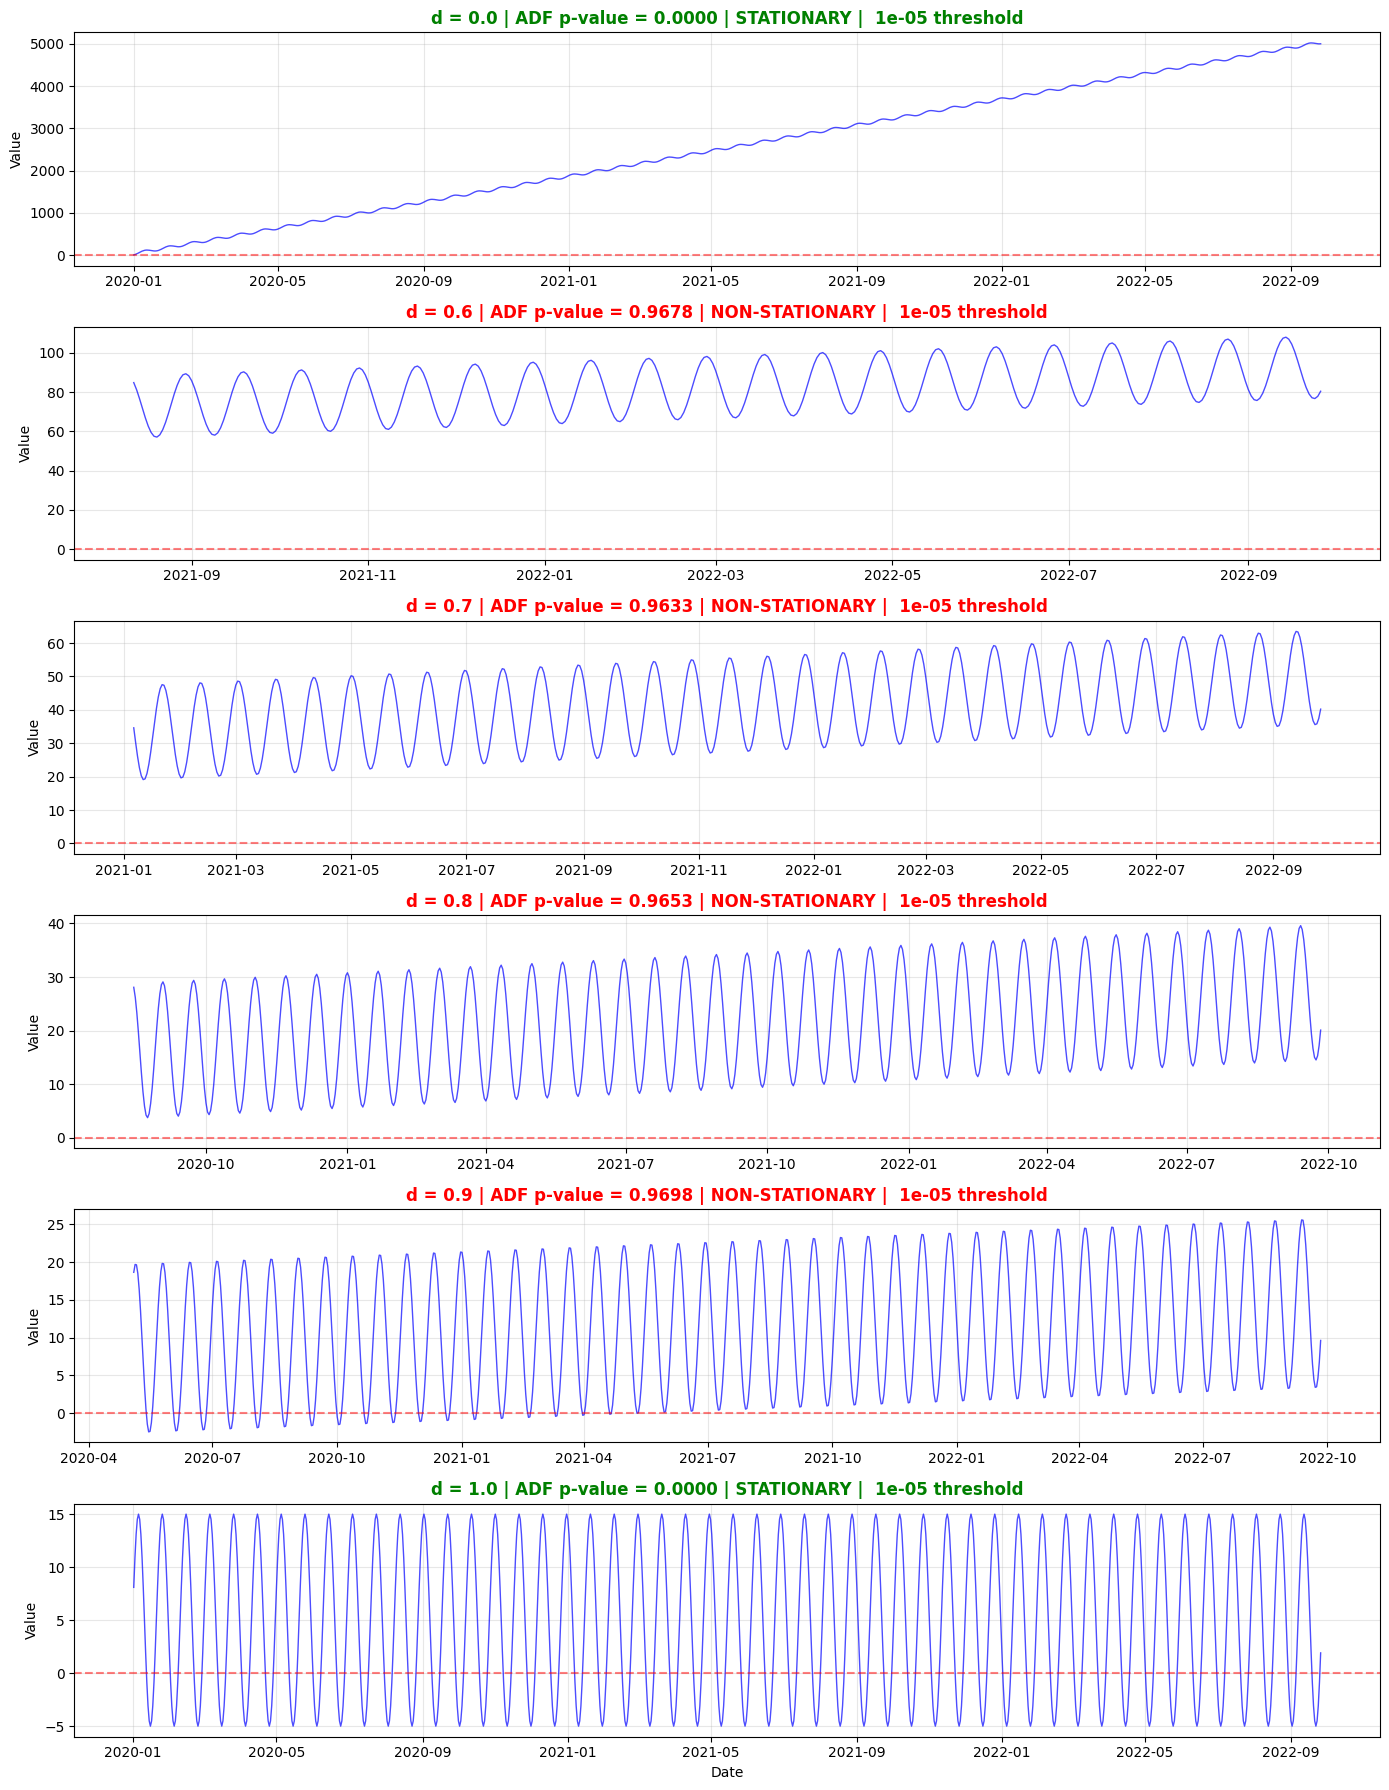

In [19]:
# Visualize fractionally differenced series at different d values
import matplotlib.pyplot as plt

# Select a few key d values to plot
d_values_to_plot = [0.0, 0.6, 0.7, 0.8, 0.9, 1.0]
thres = 1e-5

print("\nSkipping d values 0.1 - 0.5 Errors")

fig, axes = plt.subplots(len(d_values_to_plot), 1, figsize=(14, 3 * len(d_values_to_plot)))

for i, d in enumerate(d_values_to_plot):
    # Apply fractional differencing
    series_frac = fracDiff_FFD(sin_series_cumsum, d, thres=thres)
    
    # Perform ADF test
    adf_result = adfuller(series_frac.dropna(), autolag='AIC')
    p_value = adf_result[1]
    
    # Plot
    axes[i].plot(series_frac.index, series_frac.values, linewidth=1, color='blue', alpha=0.7)
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
    
    # Color code title based on stationarity
    title_color = 'green' if p_value < 0.05 else 'red'
    status = 'STATIONARY' if p_value < 0.05 else 'NON-STATIONARY'
    axes[i].set_title(f'd = {d:.1f} | ADF p-value = {p_value:.4f} | {status} | {thres: .0e} threshold', 
                      color=title_color, fontweight='bold')
    
    if i == len(d_values_to_plot) - 1:
        axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------

## 3.	Take the series from exercise 2(b) above:
(a)	Fit the series to a sine function. What is the R-squared?


SINE FUNCTION REGRESSION FIT

Fitted Parameters:
  Amplitude:        31.9623
  Frequency:        0.050000
  Phase:            -1.4137 radians (-81.00°)
  Vertical Shift:   36.5688
  Linear Trend:     5.0000

Goodness of Fit:
  R-squared:        1.000000
  RMSE:             0.0000

Original Parameters (for reference):
  Original sine amplitude: 10
  Original sine frequency: 0.05
  Shift value: 5


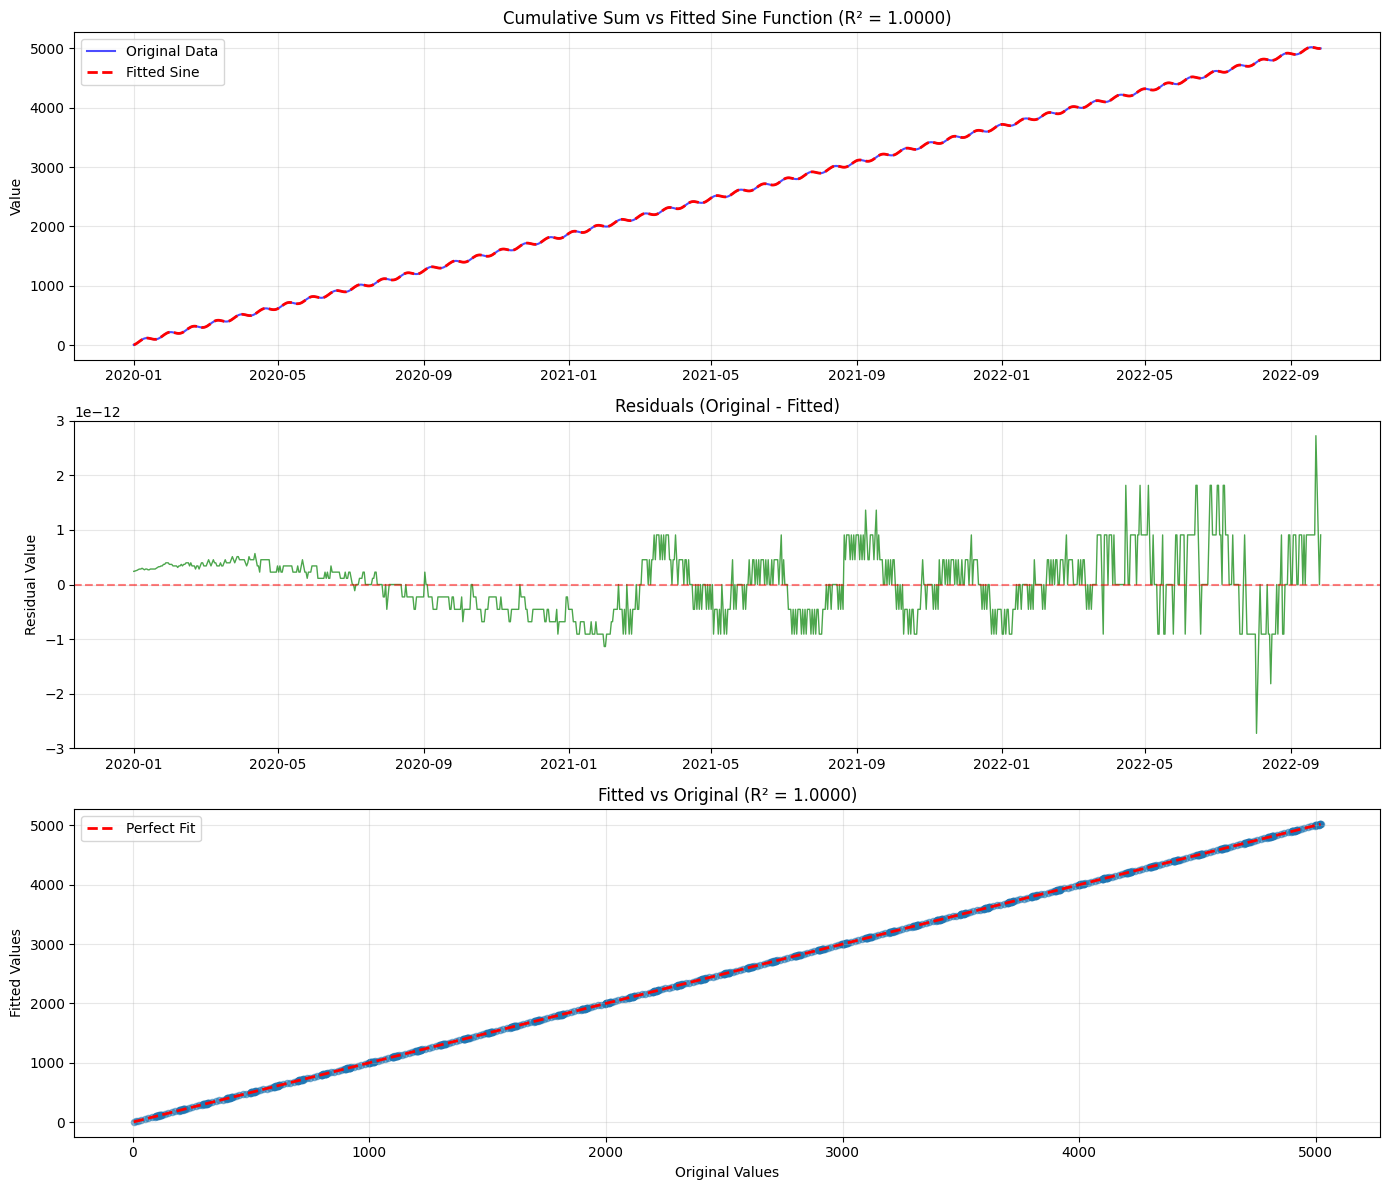


Parameter Standard Errors:
  Amplitude:        ± 0.0000
  Frequency:        ± 0.000000
  Phase:            ± 0.0000
  Vertical Shift:   ± 0.0000
  Linear Trend:     ± 0.0000


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define the sine function model to fit
def sine_model(t, amplitude, frequency, phase, vertical_shift, linear_trend):
    """
    General sine function with linear trend:
    y = A * sin(2π * f * t + φ) + c + m*t
    
    amplitude: A (amplitude of oscillation)
    frequency: f (frequency of oscillation)
    phase: φ (phase shift)
    vertical_shift: c (vertical offset)
    linear_trend: m (linear drift component)
    """
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + vertical_shift + linear_trend * t

# Prepare data for fitting
# Convert datetime index to numeric values (days from start)
t_data = np.arange(len(sin_series_cumsum))
y_data = sin_series_cumsum.values

# Initial parameter guesses (important for convergence)
# Based on visual inspection of cumulative sum of shifted sine
initial_amplitude = 100  # rough guess from oscillation amplitude
initial_frequency = 0.05  # same as original sine
initial_phase = 0
initial_vertical_shift = np.mean(y_data)
initial_linear_trend = (y_data[-1] - y_data[0]) / len(y_data)  # overall slope

initial_params = [initial_amplitude, initial_frequency, initial_phase, 
                  initial_vertical_shift, initial_linear_trend]

# Perform curve fitting
try:
    # Fit the model
    popt, pcov = curve_fit(sine_model, t_data, y_data, p0=initial_params, 
                           maxfev=10000)
    
    # Extract fitted parameters
    fit_amplitude, fit_frequency, fit_phase, fit_vertical_shift, fit_linear_trend = popt
    
    # Generate fitted values
    y_fitted = sine_model(t_data, *popt)
    
    # Calculate R-squared
    r_squared = r2_score(y_data, y_fitted)
    
    # Calculate residuals
    residuals = y_data - y_fitted
    rmse = np.sqrt(np.mean(residuals**2))
    
    # Print results
    print("="*70)
    print("SINE FUNCTION REGRESSION FIT")
    print("="*70)
    print("\nFitted Parameters:")
    print(f"  Amplitude:        {fit_amplitude:.4f}")
    print(f"  Frequency:        {fit_frequency:.6f}")
    print(f"  Phase:            {fit_phase:.4f} radians ({np.degrees(fit_phase):.2f}°)")
    print(f"  Vertical Shift:   {fit_vertical_shift:.4f}")
    print(f"  Linear Trend:     {fit_linear_trend:.4f}")
    print("\nGoodness of Fit:")
    print(f"  R-squared:        {r_squared:.6f}")
    print(f"  RMSE:             {rmse:.4f}")
    print("\nOriginal Parameters (for reference):")
    print(f"  Original sine amplitude: 10")
    print(f"  Original sine frequency: 0.05")
    print(f"  Shift value: {shift_value}")
    print("="*70)
    
    # Plot results
    fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    
    # Plot 1: Original data vs fitted curve
    axes[0].plot(sin_series_cumsum.index, y_data, linewidth=1.5, 
                 color='blue', alpha=0.7, label='Original Data')
    axes[0].plot(sin_series_cumsum.index, y_fitted, linewidth=2, 
                 color='red', linestyle='--', label='Fitted Sine')
    axes[0].set_title(f'Cumulative Sum vs Fitted Sine Function (R² = {r_squared:.4f})')
    axes[0].set_ylabel('Value')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Residuals
    axes[1].plot(sin_series_cumsum.index, residuals, linewidth=1, 
                 color='green', alpha=0.7)
    axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[1].set_title('Residuals (Original - Fitted)')
    axes[1].set_ylabel('Residual Value')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: Scatter plot - Fitted vs Original
    axes[2].scatter(y_data, y_fitted, alpha=0.5, s=20)
    axes[2].plot([y_data.min(), y_data.max()], 
                 [y_data.min(), y_data.max()], 
                 'r--', linewidth=2, label='Perfect Fit')
    axes[2].set_xlabel('Original Values')
    axes[2].set_ylabel('Fitted Values')
    axes[2].set_title(f'Fitted vs Original (R² = {r_squared:.4f})')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis: parameter standard errors
    perr = np.sqrt(np.diag(pcov))
    print("\nParameter Standard Errors:")
    print(f"  Amplitude:        ± {perr[0]:.4f}")
    print(f"  Frequency:        ± {perr[1]:.6f}")
    print(f"  Phase:            ± {perr[2]:.4f}")
    print(f"  Vertical Shift:   ± {perr[3]:.4f}")
    print(f"  Linear Trend:     ± {perr[4]:.4f}")
    
except Exception as e:
    print(f"Error in curve fitting: {e}")
    print("Try adjusting initial parameter guesses")

## (b)	Apply FFD(d = 1). Fit the series to a sine function. 

What is the R-squared?

ADF Test on FFD(d=1) of sin_series_cumsum
ADF Statistic: -56660178108703.109375
P-value: 0.000000
Stationary: YES

SINE FUNCTION REGRESSION FIT - FFD(d=1) Series

Fitted Parameters:
  Amplitude:        10.0000
  Frequency:        0.050000
  Phase:            0.3142 radians (18.00°)
  Vertical Shift:   5.0000

Goodness of Fit:
  R-squared:        1.000000
  RMSE:             0.0000

Original Parameters (for reference):
  Original sine amplitude: 10
  Original sine frequency: 0.05
  Shift value: 5


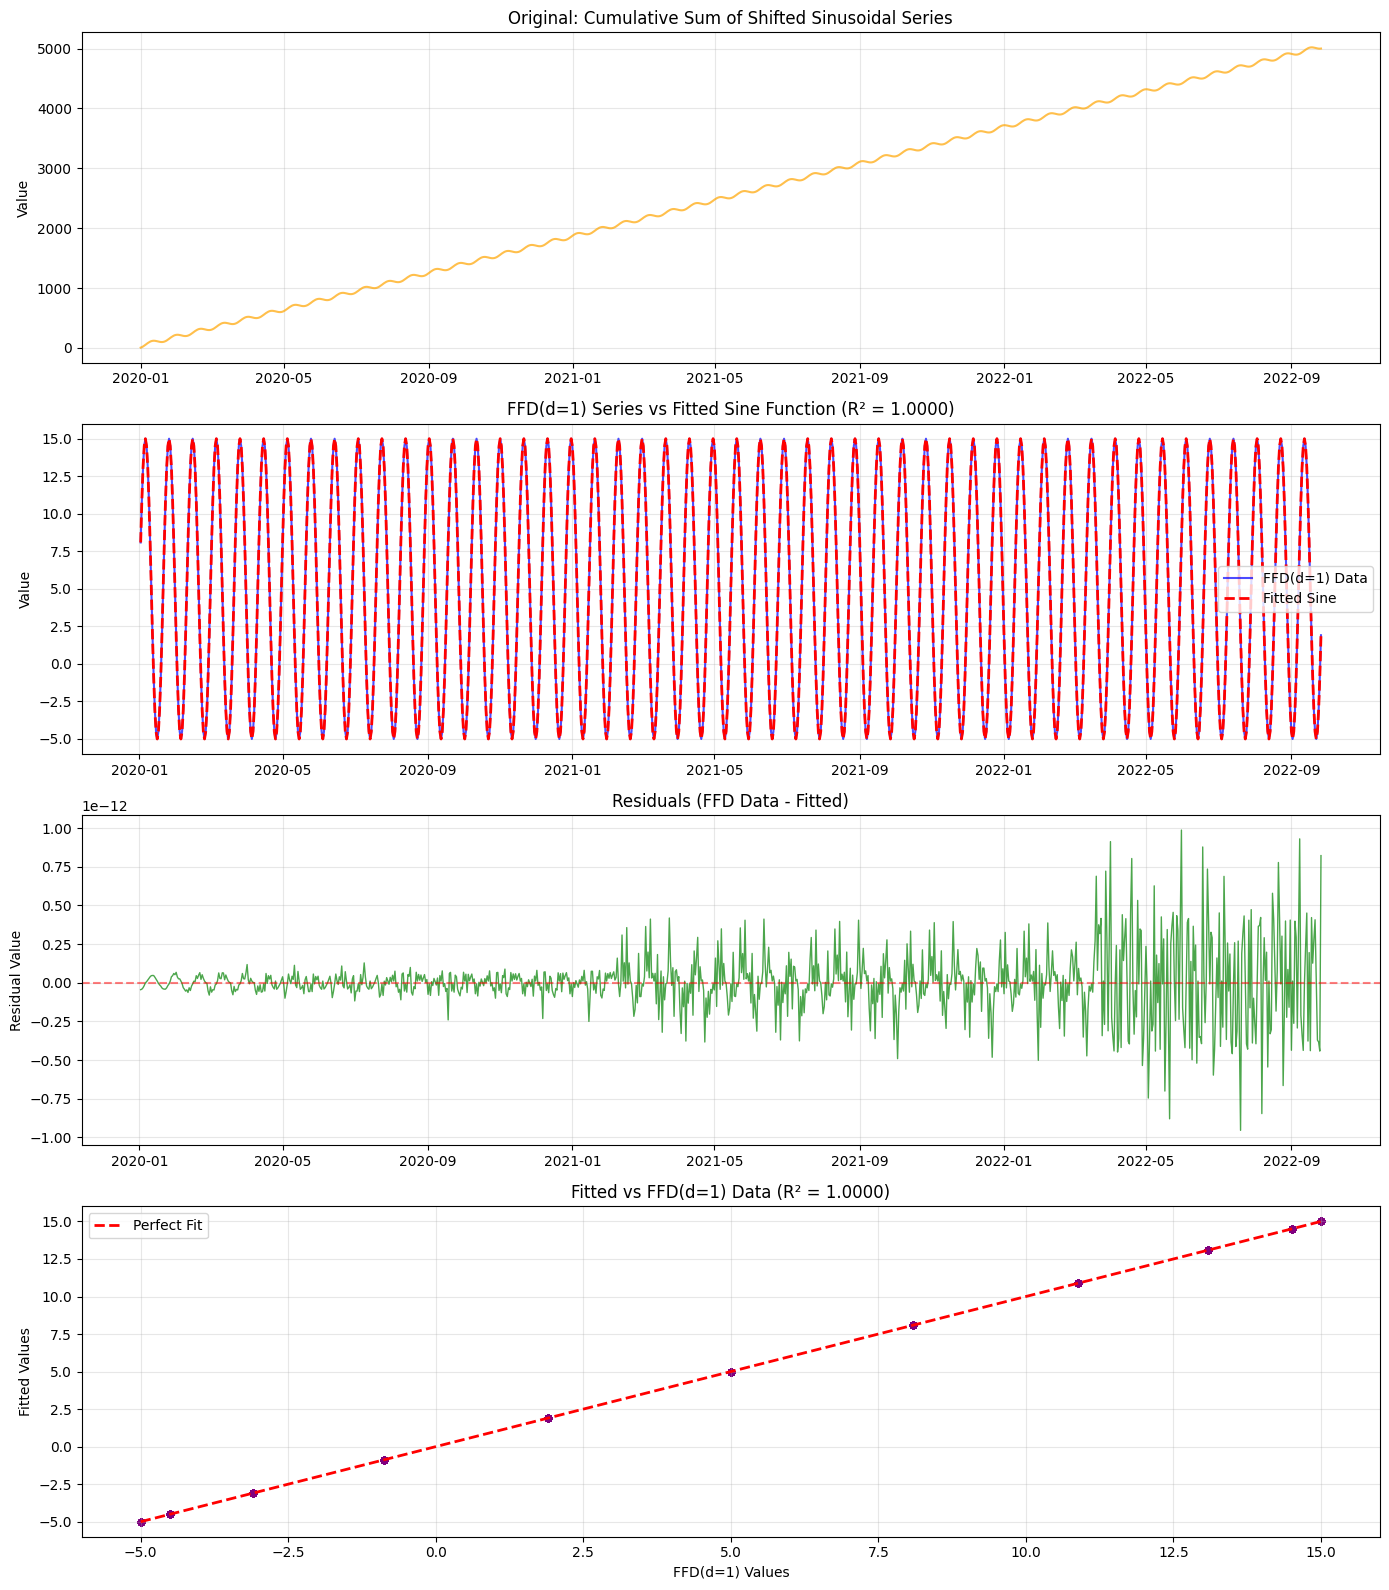


Parameter Standard Errors:
  Amplitude:        ± 0.0000
  Frequency:        ± 0.000000
  Phase:            ± 0.0000
  Vertical Shift:   ± 0.0000

COMPARISON WITH ORIGINAL SHIFTED SINE
Original amplitude:        10
Fitted amplitude:          10.0000
Amplitude recovery:        100.00%

Original frequency:        0.05
Fitted frequency:          0.050000
Frequency accuracy:        100.00%


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

# Apply FFD with d=1 to sin_series_cumsum
d = 1.0
thres = 1e-5

# Apply fractional differencing
sin_series_ffd = fracDiff_FFD(sin_series_cumsum, d, thres=thres)

# Check stationarity
adf_result = adfuller(sin_series_ffd.dropna(), autolag='AIC')
print("="*70)
print("ADF Test on FFD(d=1) of sin_series_cumsum")
print("="*70)
print(f"ADF Statistic: {adf_result[0]:.6f}")
print(f"P-value: {adf_result[1]:.6f}")
print(f"Stationary: {'YES' if adf_result[1] < 0.05 else 'NO'}")
print("="*70)

# Define the sine function model to fit
def sine_model(t, amplitude, frequency, phase, vertical_shift):
    """
    Sine function model:
    y = A * sin(2π * f * t + φ) + c
    """
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + vertical_shift

# Prepare data for fitting
t_data = np.arange(len(sin_series_ffd))
y_data = sin_series_ffd.values

# Initial parameter guesses
initial_amplitude = np.std(y_data) * np.sqrt(2)
initial_frequency = 0.05  # same as original
initial_phase = 0
initial_vertical_shift = np.mean(y_data)

initial_params = [initial_amplitude, initial_frequency, initial_phase, initial_vertical_shift]

# Perform curve fitting
try:
    # Fit the model
    popt, pcov = curve_fit(sine_model, t_data, y_data, p0=initial_params, 
                           maxfev=10000)
    
    # Extract fitted parameters
    fit_amplitude, fit_frequency, fit_phase, fit_vertical_shift = popt
    
    # Generate fitted values
    y_fitted = sine_model(t_data, *popt)
    
    # Calculate R-squared
    r_squared = r2_score(y_data, y_fitted)
    
    # Calculate residuals
    residuals = y_data - y_fitted
    rmse = np.sqrt(np.mean(residuals**2))
    
    # Print results
    print("\n" + "="*70)
    print("SINE FUNCTION REGRESSION FIT - FFD(d=1) Series")
    print("="*70)
    print("\nFitted Parameters:")
    print(f"  Amplitude:        {fit_amplitude:.4f}")
    print(f"  Frequency:        {fit_frequency:.6f}")
    print(f"  Phase:            {fit_phase:.4f} radians ({np.degrees(fit_phase):.2f}°)")
    print(f"  Vertical Shift:   {fit_vertical_shift:.4f}")
    print("\nGoodness of Fit:")
    print(f"  R-squared:        {r_squared:.6f}")
    print(f"  RMSE:             {rmse:.4f}")
    print("\nOriginal Parameters (for reference):")
    print(f"  Original sine amplitude: 10")
    print(f"  Original sine frequency: 0.05")
    print(f"  Shift value: {shift_value}")
    print("="*70)
    
    # Plot results
    fig, axes = plt.subplots(4, 1, figsize=(14, 16))
    
    # Plot 0: Original cumsum series
    axes[0].plot(sin_series_cumsum.index, sin_series_cumsum.values, 
                 linewidth=1.5, color='orange', alpha=0.7)
    axes[0].set_title('Original: Cumulative Sum of Shifted Sinusoidal Series')
    axes[0].set_ylabel('Value')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 1: FFD(d=1) series vs fitted curve
    axes[1].plot(sin_series_ffd.index, y_data, linewidth=1.5, 
                 color='blue', alpha=0.7, label='FFD(d=1) Data')
    axes[1].plot(sin_series_ffd.index, y_fitted, linewidth=2, 
                 color='red', linestyle='--', label='Fitted Sine')
    axes[1].set_title(f'FFD(d=1) Series vs Fitted Sine Function (R² = {r_squared:.4f})')
    axes[1].set_ylabel('Value')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Plot 2: Residuals
    axes[2].plot(sin_series_ffd.index, residuals, linewidth=1, 
                 color='green', alpha=0.7)
    axes[2].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[2].set_title('Residuals (FFD Data - Fitted)')
    axes[2].set_ylabel('Residual Value')
    axes[2].grid(True, alpha=0.3)
    
    # Plot 3: Scatter plot - Fitted vs Original
    axes[3].scatter(y_data, y_fitted, alpha=0.5, s=20, color='purple')
    axes[3].plot([y_data.min(), y_data.max()], 
                 [y_data.min(), y_data.max()], 
                 'r--', linewidth=2, label='Perfect Fit')
    axes[3].set_xlabel('FFD(d=1) Values')
    axes[3].set_ylabel('Fitted Values')
    axes[3].set_title(f'Fitted vs FFD(d=1) Data (R² = {r_squared:.4f})')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis: parameter standard errors
    perr = np.sqrt(np.diag(pcov))
    print("\nParameter Standard Errors:")
    print(f"  Amplitude:        ± {perr[0]:.4f}")
    print(f"  Frequency:        ± {perr[1]:.6f}")
    print(f"  Phase:            ± {perr[2]:.4f}")
    print(f"  Vertical Shift:   ± {perr[3]:.4f}")
    
    # Compare with original shifted sine series
    print("\n" + "="*70)
    print("COMPARISON WITH ORIGINAL SHIFTED SINE")
    print("="*70)
    print(f"Original amplitude:        {amplitude}")
    print(f"Fitted amplitude:          {fit_amplitude:.4f}")
    print(f"Amplitude recovery:        {(fit_amplitude/amplitude)*100:.2f}%")
    print()
    print(f"Original frequency:        {frequency}")
    print(f"Fitted frequency:          {fit_frequency:.6f}")
    print(f"Frequency accuracy:        {(fit_frequency/frequency)*100:.2f}%")
    print("="*70)
    
except Exception as e:
    print(f"Error in curve fitting: {e}")
    print("Try adjusting initial parameter guesses")

## (c)	What value of d maximizes the R-squared of a sinusoidal fit on FFD(d). 

Why?

TESTING FFD(d) WITH SINUSOIDAL FIT - FINDING OPTIMAL d

d Value    R-squared       RMSE            Amplitude       Frequency      
--------------------------------------------------------------------------------
0.00       0.000490        1443.1980       -45.2020        0.049999       
0.05       ERROR           ERROR           ERROR           ERROR          
0.10       ERROR           ERROR           ERROR           ERROR          
0.15       ERROR           ERROR           ERROR           ERROR          
0.20       ERROR           ERROR           ERROR           ERROR          
0.25       ERROR           ERROR           ERROR           ERROR          
0.30       ERROR           ERROR           ERROR           ERROR          
0.35       ERROR           ERROR           ERROR           ERROR          
0.40       ERROR           ERROR           ERROR           ERROR          
0.45       ERROR           ERROR           ERROR           ERROR          
0.50       0.978300        1.8827     

c:\Users\danmc\anaconda3\envs\MlFinLab\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


1.00       1.000000        0.0000          10.0000         0.050000       
1.05       0.984779        0.8313          9.4496          0.050001       
1.10       0.976113        0.9880          8.9273          0.050000       
1.15       0.971486        1.0170          -8.3999         0.050000       
1.20       0.969690        0.9918          -7.9288         0.049999       
1.25       0.968513        0.9539          -7.4793         0.049999       
1.30       0.969111        0.8902          -7.0554         0.050000       
1.35       0.969731        0.8316          -6.6643         0.050001       
1.40       0.971649        0.7610          6.2987          0.050000       
1.45       0.972999        0.6988          5.9422          0.049998       
1.50       0.974842        0.6355          -5.5943         0.049998       
1.55       0.976846        0.5735          -5.2770         0.050000       
1.60       0.979196        0.5141          4.9883          0.050000       
1.65       0.981361      

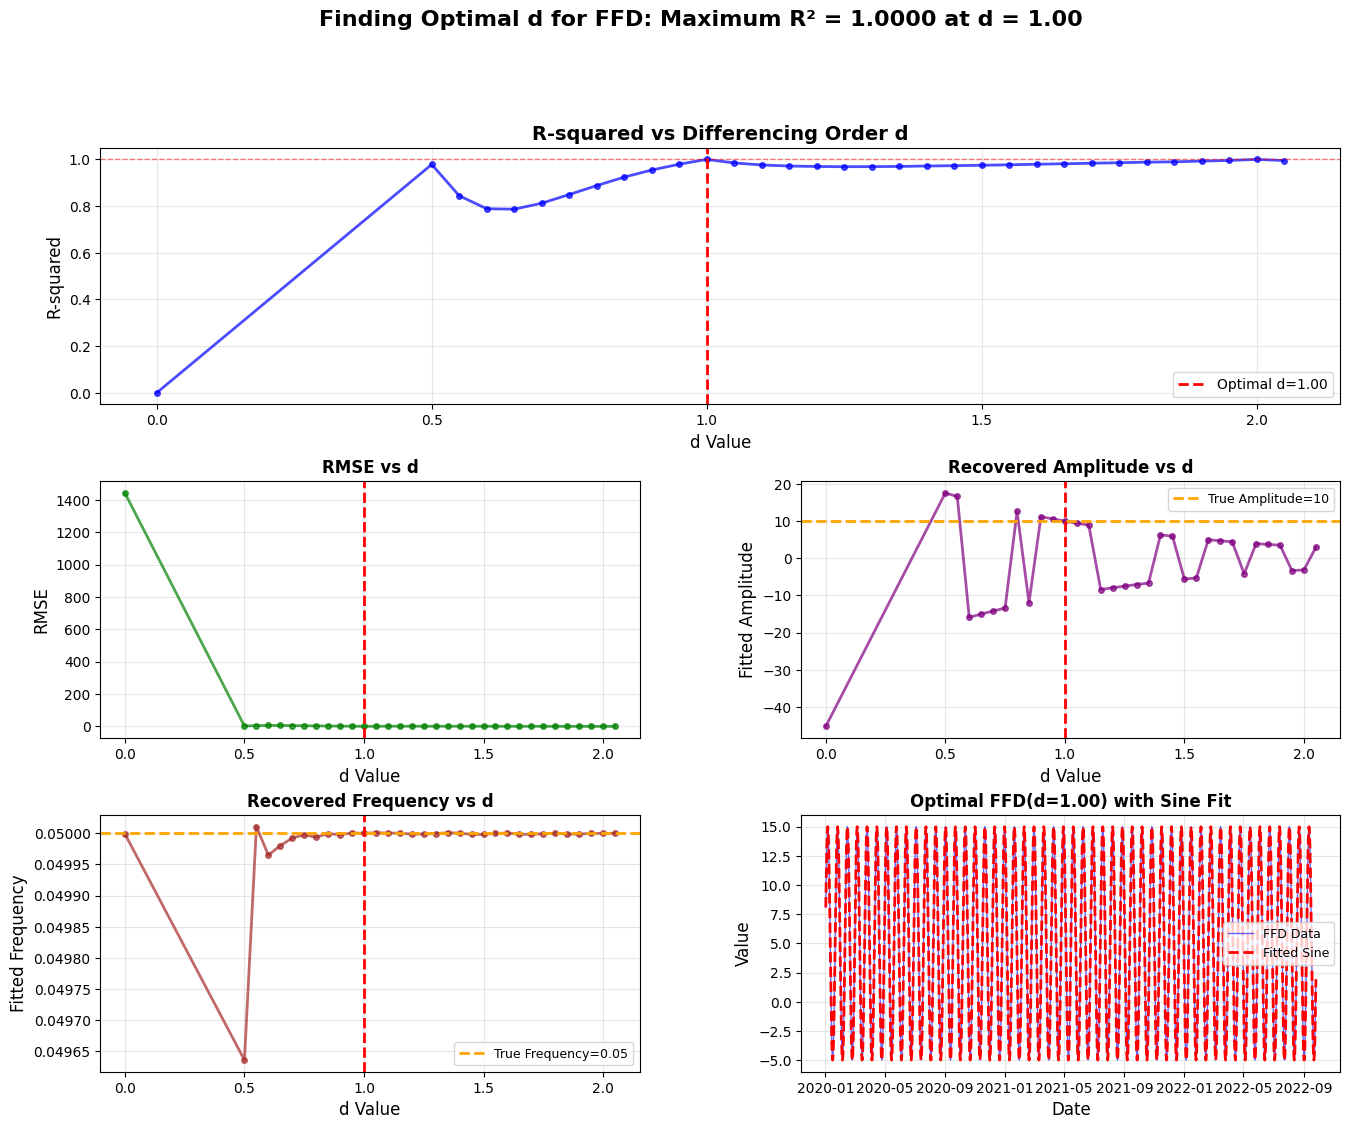


INTERPRETATION
Optimal d ≈ 1: First-order differencing is best.
This makes sense because:
  1. sin_series_cumsum = cumsum(sin_series + shift_value)
  2. FFD(d=1) ≈ first difference, which inverts the cumsum operation
  3. This recovers the original shifted sine wave pattern
  4. A sine function fits the recovered pattern perfectly


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller

# Define the sine function model to fit
def sine_model(t, amplitude, frequency, phase, vertical_shift):
    """
    Sine function model:
    y = A * sin(2π * f * t + φ) + c
    """
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + vertical_shift

# Test range of d values
d_values = np.arange(0.0, 2.1, 0.05)
thres = 1e-5

results = []

print("="*80)
print("TESTING FFD(d) WITH SINUSOIDAL FIT - FINDING OPTIMAL d")
print("="*80)
print(f"\n{'d Value':<10} {'R-squared':<15} {'RMSE':<15} {'Amplitude':<15} {'Frequency':<15}")
print("-"*80)

for d in d_values:
    try:
        # Apply FFD
        sin_series_ffd = fracDiff_FFD(sin_series_cumsum, d, thres=thres)
        
        # Prepare data for fitting
        t_data = np.arange(len(sin_series_ffd))
        y_data = sin_series_ffd.values
        
        # Initial parameter guesses
        initial_amplitude = np.std(y_data) * np.sqrt(2)
        initial_frequency = 0.05
        initial_phase = 0
        initial_vertical_shift = np.mean(y_data)
        initial_params = [initial_amplitude, initial_frequency, initial_phase, initial_vertical_shift]
        
        # Fit the model
        popt, pcov = curve_fit(sine_model, t_data, y_data, p0=initial_params, maxfev=10000)
        
        # Extract fitted parameters
        fit_amplitude, fit_frequency, fit_phase, fit_vertical_shift = popt
        
        # Generate fitted values
        y_fitted = sine_model(t_data, *popt)
        
        # Calculate R-squared
        r_squared = r2_score(y_data, y_fitted)
        
        # Calculate RMSE
        residuals = y_data - y_fitted
        rmse = np.sqrt(np.mean(residuals**2))
        
        results.append({
            'd': d,
            'r_squared': r_squared,
            'rmse': rmse,
            'amplitude': fit_amplitude,
            'frequency': fit_frequency,
            'phase': fit_phase,
            'vertical_shift': fit_vertical_shift
        })
        
        print(f"{d:<10.2f} {r_squared:<15.6f} {rmse:<15.4f} {fit_amplitude:<15.4f} {fit_frequency:<15.6f}")
        
    except Exception as e:
        print(f"{d:<10.2f} {'ERROR':<15} {'ERROR':<15} {'ERROR':<15} {'ERROR':<15}")
        results.append({
            'd': d,
            'r_squared': np.nan,
            'rmse': np.nan,
            'amplitude': np.nan,
            'frequency': np.nan,
            'phase': np.nan,
            'vertical_shift': np.nan
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df_clean = results_df.dropna()

# Find optimal d
if len(results_df_clean) > 0:
    optimal_idx = results_df_clean['r_squared'].idxmax()
    optimal_d = results_df_clean.loc[optimal_idx, 'd']
    optimal_r2 = results_df_clean.loc[optimal_idx, 'r_squared']
    optimal_amplitude = results_df_clean.loc[optimal_idx, 'amplitude']
    optimal_frequency = results_df_clean.loc[optimal_idx, 'frequency']

    print("\n" + "="*80)
    print("OPTIMAL d VALUE")
    print("="*80)
    print(f"Optimal d:            {optimal_d:.2f}")
    print(f"Maximum R-squared:    {optimal_r2:.6f}")
    print(f"Fitted Amplitude:     {optimal_amplitude:.4f}")
    print(f"Fitted Frequency:     {optimal_frequency:.6f}")
    print("\nOriginal Parameters:")
    print(f"Original Amplitude:   {amplitude}")
    print(f"Original Frequency:   {frequency}")
    print(f"Shift Value:          {shift_value}")
    print("="*80)

    # Create comprehensive visualization
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

    # Plot 1: R-squared vs d
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(results_df_clean['d'], results_df_clean['r_squared'], 
             linewidth=2, marker='o', markersize=4, color='blue', alpha=0.7)
    ax1.axvline(x=optimal_d, color='red', linestyle='--', linewidth=2, 
                label=f'Optimal d={optimal_d:.2f}')
    ax1.axhline(y=optimal_r2, color='red', linestyle='--', linewidth=1, alpha=0.5)
    ax1.set_xlabel('d Value', fontsize=12)
    ax1.set_ylabel('R-squared', fontsize=12)
    ax1.set_title('R-squared vs Differencing Order d', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)

    # Plot 2: RMSE vs d
    ax2 = fig.add_subplot(gs[1, 0])
    ax2.plot(results_df_clean['d'], results_df_clean['rmse'], 
             linewidth=2, marker='o', markersize=4, color='green', alpha=0.7)
    ax2.axvline(x=optimal_d, color='red', linestyle='--', linewidth=2)
    ax2.set_xlabel('d Value', fontsize=12)
    ax2.set_ylabel('RMSE', fontsize=12)
    ax2.set_title('RMSE vs d', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    # Plot 3: Recovered amplitude vs d
    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(results_df_clean['d'], results_df_clean['amplitude'], 
             linewidth=2, marker='o', markersize=4, color='purple', alpha=0.7)
    ax3.axhline(y=amplitude, color='orange', linestyle='--', linewidth=2, 
                label=f'True Amplitude={amplitude}')
    ax3.axvline(x=optimal_d, color='red', linestyle='--', linewidth=2)
    ax3.set_xlabel('d Value', fontsize=12)
    ax3.set_ylabel('Fitted Amplitude', fontsize=12)
    ax3.set_title('Recovered Amplitude vs d', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=9)

    # Plot 4: Recovered frequency vs d
    ax4 = fig.add_subplot(gs[2, 0])
    ax4.plot(results_df_clean['d'], results_df_clean['frequency'], 
             linewidth=2, marker='o', markersize=4, color='brown', alpha=0.7)
    ax4.axhline(y=frequency, color='orange', linestyle='--', linewidth=2, 
                label=f'True Frequency={frequency}')
    ax4.axvline(x=optimal_d, color='red', linestyle='--', linewidth=2)
    ax4.set_xlabel('d Value', fontsize=12)
    ax4.set_ylabel('Fitted Frequency', fontsize=12)
    ax4.set_title('Recovered Frequency vs d', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=9)

    # Plot 5: Optimal FFD series with fit
    ax5 = fig.add_subplot(gs[2, 1])
    sin_series_ffd_optimal = fracDiff_FFD(sin_series_cumsum, optimal_d, thres=thres)
    t_optimal = np.arange(len(sin_series_ffd_optimal))
    y_optimal = sin_series_ffd_optimal.values
    popt_optimal, _ = curve_fit(sine_model, t_optimal, y_optimal, 
                                 p0=[optimal_amplitude, optimal_frequency, 0, np.mean(y_optimal)], 
                                 maxfev=10000)
    y_fitted_optimal = sine_model(t_optimal, *popt_optimal)
    
    ax5.plot(sin_series_ffd_optimal.index, y_optimal, linewidth=1, 
             color='blue', alpha=0.6, label='FFD Data')
    ax5.plot(sin_series_ffd_optimal.index, y_fitted_optimal, linewidth=2, 
             color='red', linestyle='--', label='Fitted Sine')
    ax5.set_xlabel('Date', fontsize=12)
    ax5.set_ylabel('Value', fontsize=12)
    ax5.set_title(f'Optimal FFD(d={optimal_d:.2f}) with Sine Fit', 
                  fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    ax5.legend(fontsize=9)

    plt.suptitle(f'Finding Optimal d for FFD: Maximum R² = {optimal_r2:.4f} at d = {optimal_d:.2f}', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.show()

    # Print interpretation
    print("\n" + "="*80)
    print("INTERPRETATION")
    print("="*80)
    if optimal_d < 0.2:
        print("Optimal d ≈ 0: Little to no differencing needed.")
        print("The series may already be close to stationary or the cumsum pattern")
        print("with linear trend is better captured with minimal differencing.")
    elif 0.8 <= optimal_d <= 1.2:
        print("Optimal d ≈ 1: First-order differencing is best.")
        print("This makes sense because:")
        print("  1. sin_series_cumsum = cumsum(sin_series + shift_value)")
        print("  2. FFD(d=1) ≈ first difference, which inverts the cumsum operation")
        print("  3. This recovers the original shifted sine wave pattern")
        print("  4. A sine function fits the recovered pattern perfectly")
    elif optimal_d > 1.5:
        print("Optimal d > 1.5: Over-differencing.")
        print("This could introduce artifacts but might still capture the sine pattern.")
    else:
        print(f"Optimal d = {optimal_d:.2f}: Fractional differencing.")
        print("This balances memory preservation with stationarity.")
    print("="*80)

else:
    print("\nNo valid results obtained.")